-----------------------------------------------------------------
# Image Classification and Clustering
## Character Images
-----------------------------------------------------------------

M.Sc. Data Science

Practical Data Science

Full Name: Eirini Mylona


# Image Classification and Clustering

In [ ]:
# Read the files from my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Αντίγραφο του LREC2022_image_characters.zip"
!unzip "/content/drive/MyDrive/Αντίγραφο του BT1BigByLetters20220128CLEANED.zip"
!rm -R __MACOSX
drive.flush_and_unmount()



Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: BT1BigByLetters20220128CLEANED/ε/ε_60306_bt1_Iliad.1.517.37.png  
  inflating: __MACOSX/BT1BigByLetters20220128CLEANED/ε/._ε_60306_bt1_Iliad.1.517.37.png  
  inflating: BT1BigByLetters20220128CLEANED/ε/ε_60633_bt1_Iliad.12.269.18.png  
  inflating: __MACOSX/BT1BigByLetters20220128CLEANED/ε/._ε_60633_bt1_Iliad.12.269.18.png  
  inflating: BT1BigByLetters20220128CLEANED/ε/ε_60306_bt1_Iliad.1.506.1.png  
  inflating: __MACOSX/BT1BigByLetters20220128CLEANED/ε/._ε_60306_bt1_Iliad.1.506.1.png  
  inflating: BT1BigByLetters20220128CLEANED/ε/ε_65858_bt1_Iliad.19.327.6.png  
  inflating: __MACOSX/BT1BigByLetters20220128CLEANED/ε/._ε_65858_bt1_Iliad.19.327.6.png  
  inflating: BT1BigByLetters20220128CLEANED/ε/ε_60583_bt1_Iliad.14.258.25.png  
  inflating: __MACOSX/BT1BigByLetters20220128CLEANED/ε/._ε_60583_bt1_Iliad.14.258.25.png  
  inflating: BT1BigByLetters20220128CLEANED/ε/ε_60306_bt1_Iliad.1.531.33.png  
  inflating: __MACO

In [ ]:
# pip install gdown
#!gdown 1cj3NBSXE3EHgc0L54xhAvH_AdNVeFuZs
#!gdown 1iWq0DEv_SrB947O9z2klKKneYrYHSCqL
#!unzip BT1BigByLetters20220128CLEANED.zip
#!unzip LREC2022_image_characters.zip
#!rm -R __MACOSX

You are provided two image datasets, comprising optical characters. The first is `LREC2022_image_characters` and the second is `BT1BigByLetters20220128CLEANED`.

```
WARNING: Any seed (e.g., `random_state` to split, etc.) should be set to 39.
```

# Part 1
* Use the cell below to load the unziped images (28*28 pixels) in grayscale of two datasets. Code to assist you with saving the first as a DataFrame is provided below.
* You are also provided an Excel file that comprises the name of each image of the `LREC2022_image_characters` dataset along with the respective character and the century of the document the image is taken from.
* Merge the columns of the filename, the century and the character with the dataframe of the `LREC2022_image_characters` dataset.
* The name of each image of the `BT1BigByLetters20220128CLEANED` dataset comprises important information encoded in the name. For example, the name `ϲ_60701_bt1_Iliad.11.40.17.png` has two parts in the beginning, the character (c) which you already know and `60701`, which you want to store separately. Create a new column named `TM` at the dataframe of this dataset that will hold this information.
* Add a new column in each dataframe that will hold the image flattened (one vector per image) and normalised (values should be between 0 and 1).
* Show a sample line per dataset to showcase that you have done all the above steps.
* Visualise some images.

In [ ]:
# loading the lrec images into a dataframe
from tqdm.notebook import tqdm
import os
import pandas as pd
import cv2

H, W = 28, 28
GRAY = True

def image_read(path, h=H, w=W, color=cv2.COLOR_BGR2GRAY):
    try:
        img = cv2.imread(path)
        img = cv2.resize(img, (h, w))
        img = cv2.cvtColor(img, color)
    except:
        print(f"WARNING: Excluding '{path}'...")
    return img

In [ ]:
# Create a dataframe for the BT1BigByLetters20220128CLEANED (ds1) dataset
root = "BT1BigByLetters20220128CLEANED"
names, images = [], []
folders = []
for folder in tqdm(os.listdir(root)):
  if folder==".DS_Store":
    continue
  else:
    folders.append(f"{root}/{folder}")
  '''for elem in os.listdir(f"{root}/{folder}"):
     print elem'''
for folder in folders:
  print(folder)
  for img_path in os.listdir(folder):
    if img_path=='.DS_Store':
      continue
    #print(img_path)
    img=image_read(f"{folder}/{img_path}")
    images.append(img)
    names.append(img_path)
ds1 = pd.DataFrame({"name":names, "img":images})
ds1["flatten"] = ds1.img.apply(lambda img: img.reshape(H*W).flatten()) # flattening

  0%|          | 0/25 [00:00<?, ?it/s]

BT1BigByLetters20220128CLEANED/ξ
BT1BigByLetters20220128CLEANED/δ
BT1BigByLetters20220128CLEANED/κ
BT1BigByLetters20220128CLEANED/ψ
BT1BigByLetters20220128CLEANED/ο
BT1BigByLetters20220128CLEANED/μ
BT1BigByLetters20220128CLEANED/λ
BT1BigByLetters20220128CLEANED/χ
BT1BigByLetters20220128CLEANED/ρ
BT1BigByLetters20220128CLEANED/τ
BT1BigByLetters20220128CLEANED/α
BT1BigByLetters20220128CLEANED/ε
BT1BigByLetters20220128CLEANED/φ
BT1BigByLetters20220128CLEANED/ω
BT1BigByLetters20220128CLEANED/θ
BT1BigByLetters20220128CLEANED/η
BT1BigByLetters20220128CLEANED/ϲ
BT1BigByLetters20220128CLEANED/β
BT1BigByLetters20220128CLEANED/γ
BT1BigByLetters20220128CLEANED/υ
BT1BigByLetters20220128CLEANED/ν
BT1BigByLetters20220128CLEANED/π
BT1BigByLetters20220128CLEANED/ι
BT1BigByLetters20220128CLEANED/ζ


In [ ]:
# View the first rows of ds1
ds1.head()

,name,img,flatten
0,ξ_60306_bt1_Iliad.1.77.33.png,"[[159, 155, 148, 144, 138, 146, 136, 147, 145,...","[159, 155, 148, 144, 138, 146, 136, 147, 145, ..."
1,ξ_60471_bt1_Iliad.15.441.14.png,"[[109, 97, 100, 93, 97, 94, 93, 87, 84, 92, 98...","[109, 97, 100, 93, 97, 94, 93, 87, 84, 92, 98,..."
2,ξ_60891_bt1_Iliad.18.270.23.png,"[[72, 59, 48, 37, 60, 76, 74, 84, 90, 83, 68, ...","[72, 59, 48, 37, 60, 76, 74, 84, 90, 83, 68, 5..."
3,ξ_60306_bt1_Iliad.1.501.8.png,"[[147, 149, 149, 158, 159, 159, 149, 145, 166,...","[147, 149, 149, 158, 159, 159, 149, 145, 166, ..."
4,ξ_60633_bt1_Iliad.12.269.19.png,"[[92, 84, 75, 88, 85, 83, 85, 83, 84, 86, 105,...","[92, 84, 75, 88, 85, 83, 85, 83, 84, 86, 105, ..."


In [ ]:
# Dimensions of ds1
ds1.shape

(6096, 3)

In [ ]:
# Create a dataframe for the LREC2022_image_characters (ds2) dataset
root = "image_characters"
names, images = [], []
for img_path in tqdm(os.listdir(root)):
    img = image_read(f"{root}/{img_path}")
    images.append(img)
    names.append(img_path)

ds2 = pd.DataFrame({"name":names, "img":images})
ds2["flatten"] = ds2.img.apply(lambda img: img.reshape(H*W).flatten()) # flattening

  0%|          | 0/2293 [00:00<?, ?it/s]

In [ ]:
# View the first rows of ds2
ds2.head()

,name,img,flatten
0,8.14.23.png,"[[221, 221, 222, 220, 220, 219, 219, 220, 222,...","[221, 221, 222, 220, 220, 219, 219, 220, 222, ..."
1,83.16.30.png,"[[206, 208, 212, 213, 209, 205, 204, 204, 205,...","[206, 208, 212, 213, 209, 205, 204, 204, 205, ..."
2,68.9.27.png,"[[221, 220, 219, 218, 218, 218, 218, 216, 216,...","[221, 220, 219, 218, 218, 218, 218, 216, 216, ..."
3,42.8.33.png,"[[193, 196, 199, 203, 204, 205, 204, 203, 202,...","[193, 196, 199, 203, 204, 205, 204, 203, 202, ..."
4,92.8.27.png,"[[218, 220, 222, 224, 225, 224, 224, 221, 220,...","[218, 220, 222, 224, 225, 224, 224, 221, 220, ..."


In [ ]:
# Dimensions of ds2
ds2.shape

(2293, 3)

In [ ]:
# load the excel file and create a new dataframe with these data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
ds2_ex = pd.read_excel("/content/OCs10-12CE.xlsx")
ds2_ex

,file name,character,encoded character,century
0,1.5.1.png,λ,NaN,11
1,1.5.2.png,ο,NaN,11
2,1.5.3.png,τ,NaN,11
3,1.5.4.png,ρ,NaN,11
4,1.5.5.png,ι,NaN,11
...,...,...,...,...
1223,94.23.34.png,υ,NaN,10
1224,94.23.35.png,ν,NaN,10
1225,94.23.36.png,α,NaN,10
1226,94.23.37.png,τ,NaN,10


We observe that the 2 dataframes ds2 and ds2_ex have different dimensions. Our target is to merge them according to their name and where the two dataframes have different objects to throw them away because these do not provide us any new information. We want to choose only the common elements between the 2 datasets.

In [ ]:
# Rename the column file name as name in order to do an inner join between the 2 dataframes using name as a key
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
ds2_ex=ds2_ex.rename(columns={"file name": "name"})

In [ ]:
# Merge the two dataframes on 'name'.
# Create a new dataframe which consists of the ds2 dataframe and the columns name, character, encoded character and century taken from the excel file
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
ds2_new = pd.merge(ds2,ds2_ex,how='inner',on="name")

In [ ]:
# We drop the column encoded character which is consisted of NaN values and does not give as any information
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
ds2_new=ds2_new.drop(['encoded character'], axis=1)
ds2_new.head()

,name,img,flatten,character,century
0,8.14.23.png,"[[221, 221, 222, 220, 220, 219, 219, 220, 222,...","[221, 221, 222, 220, 220, 219, 219, 220, 222, ...",ν,11
1,83.16.30.png,"[[206, 208, 212, 213, 209, 205, 204, 204, 205,...","[206, 208, 212, 213, 209, 205, 204, 204, 205, ...",NaN,12
2,92.8.27.png,"[[218, 220, 222, 224, 225, 224, 224, 221, 220,...","[218, 220, 222, 224, 225, 224, 224, 221, 220, ...",τ,10
3,82.28.13.png,"[[191, 190, 189, 189, 191, 194, 196, 197, 191,...","[191, 190, 189, 189, 191, 194, 196, 197, 191, ...",α,12
4,8.1.1.png,"[[217, 218, 214, 210, 211, 214, 218, 216, 212,...","[217, 218, 214, 210, 211, 214, 218, 216, 212, ...",τ,11


We observed that the column character consists of a lot of NaN values. These values don't give us any information and will not help as to make any future prediction.
Thus, we decided to drop the instances which don't have a character because these cases don't give us further information.

In [ ]:
# https://datatofish.com/count-nan-pandas-dataframe/
# Count the NaNs of the dataframe
ds2_new.isna().sum().sum()
# Count the NaNs of the dataframe of the column character
ds2_new['character'].isna().sum() # We observe that all the NaN values contained in ds2_new dataframe are in column character
# drop the NaNs
ds2_new=ds2_new.dropna()


In [ ]:
# Reset index in the ds2
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
ds2_new=ds2_new.reset_index()
# Hold only the columns we want
ds2_new=ds2_new[['name','img','flatten','character','century']]
ds2_new

,name,img,flatten,character,century
0,8.14.23.png,"[[221, 221, 222, 220, 220, 219, 219, 220, 222,...","[221, 221, 222, 220, 220, 219, 219, 220, 222, ...",ν,11
1,92.8.27.png,"[[218, 220, 222, 224, 225, 224, 224, 221, 220,...","[218, 220, 222, 224, 225, 224, 224, 221, 220, ...",τ,10
2,82.28.13.png,"[[191, 190, 189, 189, 191, 194, 196, 197, 191,...","[191, 190, 189, 189, 191, 194, 196, 197, 191, ...",α,12
3,8.1.1.png,"[[217, 218, 214, 210, 211, 214, 218, 216, 212,...","[217, 218, 214, 210, 211, 214, 218, 216, 212, ...",τ,11
4,94.13.21.png,"[[228, 228, 228, 229, 229, 229, 229, 229, 229,...","[228, 228, 228, 229, 229, 229, 229, 229, 229, ...",σ,10
...,...,...,...,...,...
1077,94.29.12.png,"[[221, 218, 220, 221, 224, 226, 229, 228, 228,...","[221, 218, 220, 221, 224, 226, 229, 228, 228, ...",α,10
1078,92.8.12.png,"[[207, 221, 224, 227, 229, 225, 220, 221, 225,...","[207, 221, 224, 227, 229, 225, 220, 221, 225, ...",π,10
1079,82.28.15.png,"[[192, 190, 188, 185, 183, 181, 181, 181, 181,...","[192, 190, 188, 185, 183, 181, 181, 181, 181, ...",ι,12
1080,83.12.2.png,"[[163, 163, 163, 164, 165, 167, 168, 169, 170,...","[163, 163, 163, 164, 165, 167, 168, 169, 170, ...",ε,12


In [ ]:
# Create a new column named TM with the 6 numbers
# Use a lambda function and the split method to keep the first part of the name (the letter) and the second part (the number ID). The split method was implemented in the first underscore.
# Thus, we created two new columns. The first column named character and keeps the character of each image and the second named TM and keeps the ID.
# https://www.w3schools.com/python/ref_string_split.asp
ds1['character'] = ds1['name'].apply(lambda x: x.split("_")[0])
ds1['TM'] = ds1['name'].apply(lambda x: x.split("_")[1][:5])
ds1.head()

,name,img,flatten,character,TM
0,ξ_60306_bt1_Iliad.1.77.33.png,"[[159, 155, 148, 144, 138, 146, 136, 147, 145,...","[159, 155, 148, 144, 138, 146, 136, 147, 145, ...",ξ,60306
1,ξ_60471_bt1_Iliad.15.441.14.png,"[[109, 97, 100, 93, 97, 94, 93, 87, 84, 92, 98...","[109, 97, 100, 93, 97, 94, 93, 87, 84, 92, 98,...",ξ,60471
2,ξ_60891_bt1_Iliad.18.270.23.png,"[[72, 59, 48, 37, 60, 76, 74, 84, 90, 83, 68, ...","[72, 59, 48, 37, 60, 76, 74, 84, 90, 83, 68, 5...",ξ,60891
3,ξ_60306_bt1_Iliad.1.501.8.png,"[[147, 149, 149, 158, 159, 159, 149, 145, 166,...","[147, 149, 149, 158, 159, 159, 149, 145, 166, ...",ξ,60306
4,ξ_60633_bt1_Iliad.12.269.19.png,"[[92, 84, 75, 88, 85, 83, 85, 83, 84, 86, 105,...","[92, 84, 75, 88, 85, 83, 85, 83, 84, 86, 105, ...",ξ,60633


In [ ]:
# normalized flatten ds1
# Add a new column on the dataframe ds1, named normalized, which consists the normalized flattened values
# In order to create this column (normalized) , we implement a lambda function which divides every x of flatten column with the maximum number of it (due to the fact that we have images this max is 255)
ds1['normalized']=ds1['flatten'].apply(lambda x: x/x.max())

In [ ]:
# normalized flatten ds2_new
# Add a new column on the dataframe ds2_new , named normalized, which consists the normalized flattened values
# In order to create this column (normalized) , we implement a lambda function which divides every x of flatten column with the maximum number of it (due to the fact that we have images this max is 255)
ds2_new['normalized']=ds2_new['flatten'].apply(lambda x: x/x.max())

In [ ]:
# Show a sample line of ds1 dataframe
ds1.sample(8, random_state=39)

,name,img,flatten,character,TM,normalized
3425,ε_60398_bt1_Iliad.6.85.19.png,"[[120, 118, 116, 118, 124, 131, 126, 123, 118,...","[120, 118, 116, 118, 124, 131, 126, 123, 118, ...",ε,60398,"[0.8333333333333334, 0.8194444444444444, 0.805..."
5900,ι_61228_bt1_Iliad.2.103.18.png,"[[108, 124, 125, 116, 129, 130, 123, 119, 126,...","[108, 124, 125, 116, 129, 130, 123, 119, 126, ...",ι,61228,"[0.6878980891719745, 0.7898089171974523, 0.796..."
5904,ι_60471_bt1_Iliad.15.432.3.png,"[[118, 117, 110, 111, 111, 115, 111, 107, 105,...","[118, 117, 110, 111, 111, 115, 111, 107, 105, ...",ι,60471,"[0.921875, 0.9140625, 0.859375, 0.8671875, 0.8..."
2971,ε_60701_bt1_Iliad.11.52.25.png,"[[134, 141, 149, 118, 156, 149, 149, 123, 130,...","[134, 141, 149, 118, 156, 149, 149, 123, 130, ...",ε,60701,"[0.5425101214574899, 0.5708502024291497, 0.603..."
4592,υ_60476_bt1_ILIAD.22.3.29.png,"[[102, 111, 83, 71, 76, 90, 90, 99, 108, 116, ...","[102, 111, 83, 71, 76, 90, 90, 99, 108, 116, 1...",υ,60476,"[0.7132867132867133, 0.7762237762237763, 0.580..."
1345,λ_60476_bt1_ILIAD.22.53.2.png,"[[105, 111, 108, 109, 111, 101, 99, 100, 96, 8...","[105, 111, 108, 109, 111, 101, 99, 100, 96, 87...",λ,60476,"[0.6907894736842105, 0.7302631578947368, 0.710..."
4260,ϲ_61210_bt1_Iliad.10.425.32.png,"[[146, 171, 161, 165, 173, 157, 160, 158, 148,...","[146, 171, 161, 165, 173, 157, 160, 158, 148, ...",ϲ,61210,"[0.6854460093896714, 0.8028169014084507, 0.755..."
1184,μ_60476_bt1_ILIAD.22.44.3.png,"[[123, 131, 122, 127, 126, 133, 135, 130, 127,...","[123, 131, 122, 127, 126, 133, 135, 130, 127, ...",μ,60476,"[0.825503355704698, 0.8791946308724832, 0.8187..."


In [ ]:
# Show a sample line of ds2_new dataframe
ds2_new.sample(8, random_state=39)

,name,img,flatten,character,century,normalized
747,82.3.25.png,"[[196, 199, 201, 200, 196, 192, 191, 194, 191,...","[196, 199, 201, 200, 196, 192, 191, 194, 191, ...",α,12,"[0.92018779342723, 0.9342723004694836, 0.94366..."
270,1.14.42.png,"[[224, 224, 224, 223, 223, 223, 224, 222, 222,...","[224, 224, 224, 223, 223, 223, 224, 222, 222, ...",ω,11,"[0.9105691056910569, 0.9105691056910569, 0.910..."
991,83.6.23.png,"[[219, 220, 219, 218, 217, 216, 218, 219, 217,...","[219, 220, 219, 218, 217, 216, 218, 219, 217, ...",α,12,"[0.9909502262443439, 0.995475113122172, 0.9909..."
829,94.3.6.png,"[[234, 233, 233, 232, 233, 232, 233, 235, 235,...","[234, 233, 233, 232, 233, 232, 233, 235, 235, ...",τ,10,"[0.9397590361445783, 0.9357429718875502, 0.935..."
727,1.5.35.png,"[[216, 218, 221, 221, 213, 212, 211, 214, 218,...","[216, 218, 221, 221, 213, 212, 211, 214, 218, ...",π,11,"[0.9432314410480349, 0.9519650655021834, 0.965..."
623,94.29.39.png,"[[214, 213, 212, 214, 216, 217, 216, 214, 215,...","[214, 213, 212, 214, 216, 217, 216, 214, 215, ...",ε,10,"[0.9511111111111111, 0.9466666666666667, 0.942..."
398,92.8.19.png,"[[200, 177, 156, 147, 142, 139, 138, 142, 155,...","[200, 177, 156, 147, 142, 139, 138, 142, 155, ...",υ,10,"[0.8658008658008658, 0.7662337662337663, 0.675..."
250,1.10.35.png,"[[210, 200, 182, 170, 173, 186, 202, 213, 217,...","[210, 200, 182, 170, 173, 186, 202, 213, 217, ...",α,11,"[0.9292035398230089, 0.8849557522123894, 0.805..."


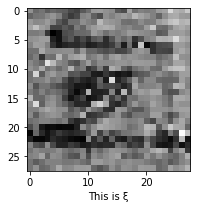

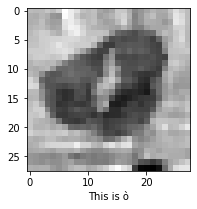

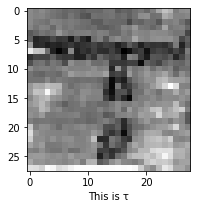

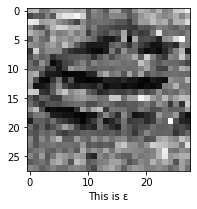

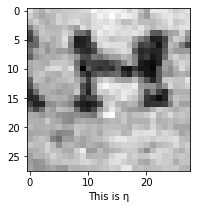

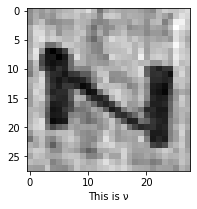

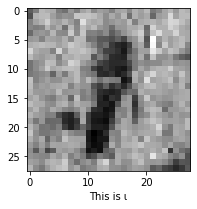

In [ ]:
# Visualization of some images of dataframe ds1
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/6
import matplotlib.pyplot as plt
for i in range(1,6096,1000):
  fig, ax = plt.subplots(figsize=(3,3))
  ax.imshow(ds1.img[i],cmap='gray')
  plt.xlabel(f"This is {ds1.character[i]}")

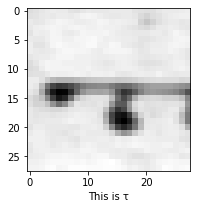

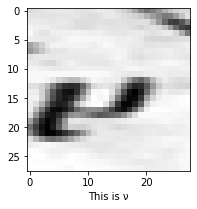

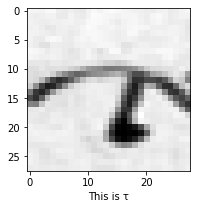

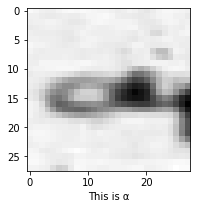

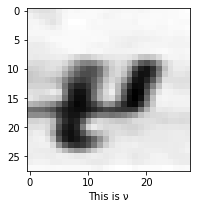

In [ ]:
# Visualization of some images of dataframe ds2_new
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/6
import matplotlib.pyplot as plt
for i in range(1,1082,250):
  fig, ax = plt.subplots(figsize=(3,3))
  ax.imshow(ds2_new.img[i],cmap='gray')
  plt.xlabel(f"This is {ds2_new.character[i]}")

# Part 2
* Visualise the character frequency per dataset (exact values to be shown also).
* Visualise also the century (of the first) and the TM frequency (of the second dataset).

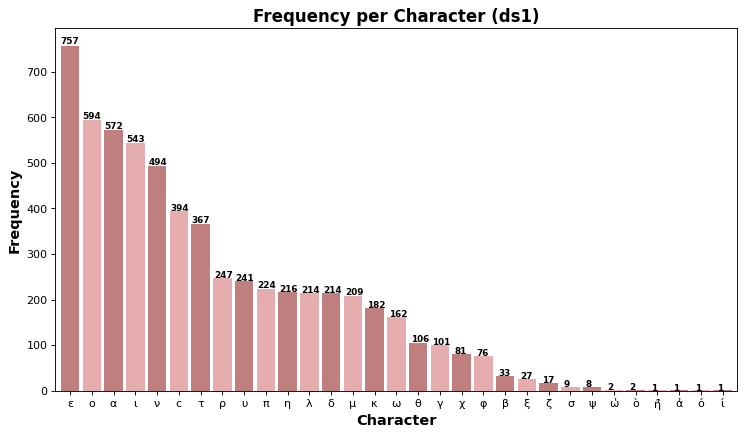

In [ ]:
# Visualise the frequency of each character for ds1 dataframe
# https://digestize.medium.com/how-to-add-counts-to-python-matplotlib-pandas-dataframe-bar-charts-15c26e3517f7 #
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(11, 6), dpi=80)
ax=ds1['character'].value_counts().plot.bar(color=['maroon','indianred'],width=0.85, alpha=0.5)
plt.xlabel("Character", size=13, weight='bold')
plt.ylabel("Frequency", size=13, weight='bold')
plt.title("Frequency per Character (ds1)",  size=15, weight='bold')
plt.xticks(rotation='horizontal')
# Add the counts on top the bars
for i in ax.patches:
  ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), size=8, weight='bold')
plt.show()

From the above plot, we observe that some characters, such as 'σ', 'ψ' or the characters with the special symbols (ex. 'ά') , rarely appear. Also, we observe that the most frequent character is 'ε' with sum 757. It follows the character 'ο' with a sum of 594.

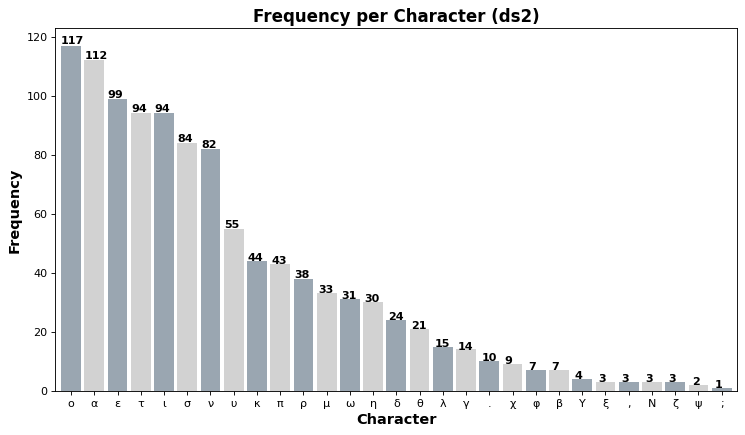

In [ ]:
# Visualise the frequency of each character for ds2_new dataframe
# https://digestize.medium.com/how-to-add-counts-to-python-matplotlib-pandas-dataframe-bar-charts-15c26e3517f7 #
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(11, 6), dpi=80)
ax=ds2_new['character'].value_counts().plot.bar(color=['slategray','silver'],width=0.85, alpha=0.7)
plt.xlabel("Character", size=13, weight='bold')
plt.ylabel("Frequency", size=13, weight='bold')
plt.title("Frequency per Character (ds2)", size=15, weight='bold')
plt.xticks(rotation='horizontal')
# Add the counts on top the bars
for i in ax.patches:
  ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), weight='bold')
plt.show()

From the above plot, we observe that some characters, such as ' γ ',' φ ',' ψ ' or special symbols (ex. ' . ' , ' ; ') , rarely appear. Also, we observe that the most frequent character is 'ο' with sum 117. It follows the character 'α' with a sum of 112.
Compared the two datasets, we can easily understand that the most frequent used characters in this specific period of time seems to be the vowels ' α ',' ο ',' ε ',' ι ' and the less used characters seems to be some consonants such as ' ξ ', ' φ ' etc.

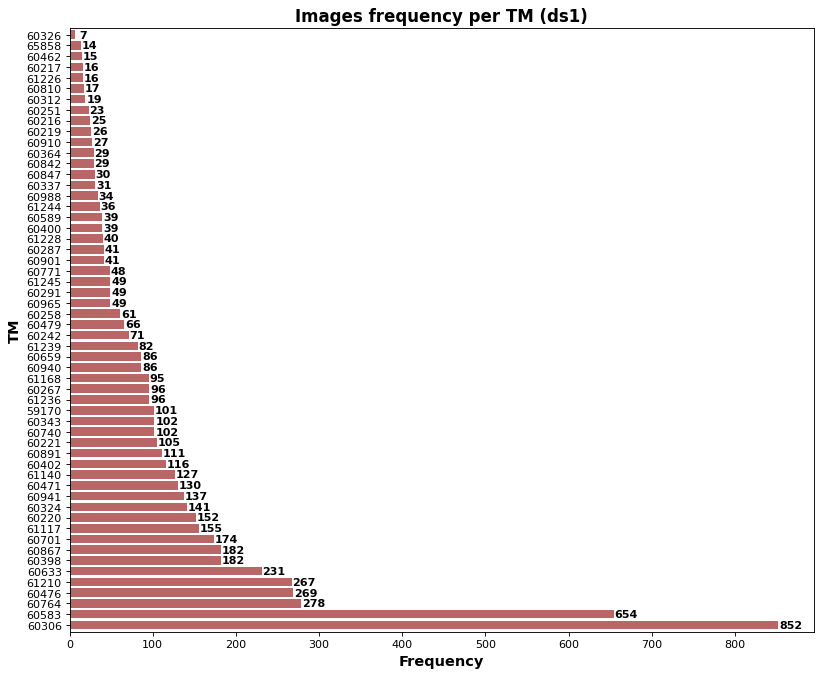

In [ ]:
# Visualise the frequency of each TM for ds1 dataframe
# https://digestize.medium.com/how-to-add-counts-to-python-matplotlib-pandas-dataframe-bar-charts-15c26e3517f7
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12,10), dpi=80)
ax=ds1['TM'].value_counts().plot.barh(color='darkred',width=0.8, alpha=0.6)
plt.xlabel("Frequency", size=13, weight='bold')
plt.ylabel("TM", size=13, weight='bold')
plt.title("Images frequency per TM (ds1)", size=15, weight='bold')
# Add the counts on top the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,'{:2.0f}'.format(width), ha = 'left',va = 'center', weight='bold')


From the above plot, it is obviously that the most of the images contained in ds1 are contained in the TM with number 60306 (852). It follows the TM 60583 with a sum of 654 images. The TM with the less contained images seems to be the 60326 with a sum of 7 images.

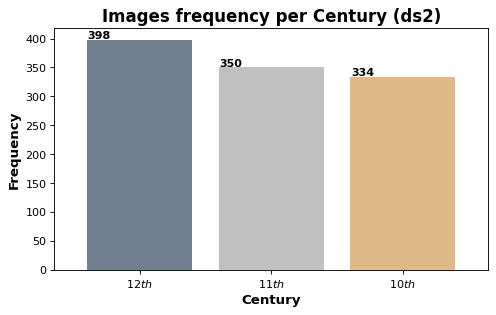

In [ ]:
# Visualise the frequency of each century for ds2_new dataframe
# https://digestize.medium.com/how-to-add-counts-to-python-matplotlib-pandas-dataframe-bar-charts-15c26e3517f7
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(7, 4), dpi=80)
ax=ds2_new['century'].value_counts().plot.bar(color=['slategray','silver','burlywood'],width=0.8)
plt.xticks(rotation='horizontal')
plt.xlabel("Century", size=12, weight='bold')
plt.ylabel("Frequency", size=12, weight='bold')
plt.title("Images frequency per Century (ds2)", size=15, weight='bold')
labels=['12$th$','11$th$','10$th$']
ax.set_xticklabels(labels)
# Add the counts on top the bars
for i in ax.patches:
  ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), weight='bold')
plt.show()

From the above plot, we can easily undestand that the most images of the dataset 2 (ds2_new) are observed to belong to the 12th century. Although, it seems that the dataset is balanced in respect to century, due to the fact that all the centuries differ slightly in their frequency number of images.

# Part 3
* Train a machine learning algorithm for the task of classifying the character depicted in the image. Visualise the confusion matrix for the task.

* Train and assess the same algorithms for the task of classifying the century for the first and the TM for the second dataset. Show the classification report per task.

* Report your findings with respective text cells in this notebook.

# Part 3 - Question A

In [ ]:
#### PART 3 QUESTION A #####
# Create a new dataframe for each dataset which consists only of the columns normalized and character
ds1_=ds1[['normalized','character']]
ds2_=ds2_new[['normalized','character']]
# Merge the 2 dataframes into one in order to train a model
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
df_merged=pd.concat([ds1_,ds2_])
df_merged=df_merged.reset_index()
df_merged=df_merged[['normalized','character']]
df_merged

,normalized,character
0,"[0.9352941176470588, 0.9117647058823529, 0.870...",ξ
1,"[0.7622377622377622, 0.6783216783216783, 0.699...",ξ
2,"[0.6260869565217392, 0.5130434782608696, 0.417...",ξ
3,"[0.8448275862068966, 0.8563218390804598, 0.856...",ξ
4,"[0.773109243697479, 0.7058823529411765, 0.6302...",ξ
...,...,...
7173,"[0.9484978540772532, 0.9356223175965666, 0.944...",α
7174,"[0.8922413793103449, 0.9525862068965517, 0.965...",π
7175,"[0.9504950495049505, 0.9405940594059405, 0.930...",ι
7176,"[0.8810810810810811, 0.8810810810810811, 0.881...",ε


In [ ]:
# Create a frequency table of character
table_freq_char=df_merged['character'].value_counts()

In [ ]:
# https://stackoverflow.com/questions/66424216/drop-infrequent-values-in-column
# drop the characters whose sum is lower than 10 because these characters  will not help me to train the model correctly due to the fact that they constitute a low percentage in the whole dataset
to_drop = table_freq_char[table_freq_char <= 10].index
df_merged = df_merged[~df_merged['character'].isin(to_drop)]

In [ ]:
df_merged.shape

(7139, 2)

In [ ]:
# Reset the index of the df_merged dataframe on which we dropped the characters whose sum was lower than 10 in the dataset
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_merged=df_merged.reset_index()
df_merged=df_merged[['normalized','character']]
df_merged

,normalized,character
0,"[0.9352941176470588, 0.9117647058823529, 0.870...",ξ
1,"[0.7622377622377622, 0.6783216783216783, 0.699...",ξ
2,"[0.6260869565217392, 0.5130434782608696, 0.417...",ξ
3,"[0.8448275862068966, 0.8563218390804598, 0.856...",ξ
4,"[0.773109243697479, 0.7058823529411765, 0.6302...",ξ
...,...,...
7134,"[0.9484978540772532, 0.9356223175965666, 0.944...",α
7135,"[0.8922413793103449, 0.9525862068965517, 0.965...",π
7136,"[0.9504950495049505, 0.9405940594059405, 0.930...",ι
7137,"[0.8810810810810811, 0.8810810810810811, 0.881...",ε


**Slit the data to train and test sets.**

In [ ]:
# import the appropriate libraries
from sklearn import datasets, neighbors, linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [ ]:
# Spit the data
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Create a train dataset and a test dataset keeping the 80% of the data we have at our disposal for training and the remaining ones for test
# We use the 80% of the data to train the model and 20% of them to test our model (if it brings us accurate results)
train, test = train_test_split(df_merged,test_size=0.20, random_state=39)
# from the train data set, keep the normalized column as X_train (80% of our data)
X_train=train.iloc[:,0]
# from the train data set, keep the character column (target) as y_train (80% of our data)
y_train=train.iloc[:,1]
# from the test data set, keep the normalized column as X_test (20% of our data)
X_test=test.iloc[:,0]
# from the test data set, keep the character column (target) as X_test (20% of our data)
y_test=test.iloc[:,1]

In [ ]:
# The algorithms doesn't run for series objects. Thus, we convert the series object to list object
# https://www.geeksforgeeks.org/python-pandas-series-tolist/
X_train=X_train.tolist()
X_test=X_test.tolist()
y_train=y_train.tolist()
y_test=y_test.tolist()

**For each algorithm are represented the accuracy and the f1 scores. Due to the fact that the dataset is unbalanced only the f1 score is considered.**

**KNN algorithm**

In [ ]:
# KNN algorithm
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/11
knn = neighbors.KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

Now, we are going to check the F1 score which is a metric used in datasets with unbalanced number of data such as this. The accuracy score is also represented but we are not going to check this score due to the fact that we have unbalanced data.

In [ ]:
# Accuracy and F1 score for KNN
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/25
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
predictions=knn.predict(X_test)
print ("KNN Accuracy score: {:.4f}".format(metrics.accuracy_score(y_test, predictions)))
print ("F1 score: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

KNN Accuracy score: 0.4895
F1 score: 0.3511


The F1 score of the KNN algorithm is low. Above, is represented the confusion matrix of it.

[Text(87.0, 0.5, 'Actual Values'), Text(0.5, 51.0, 'Predicted Values')]

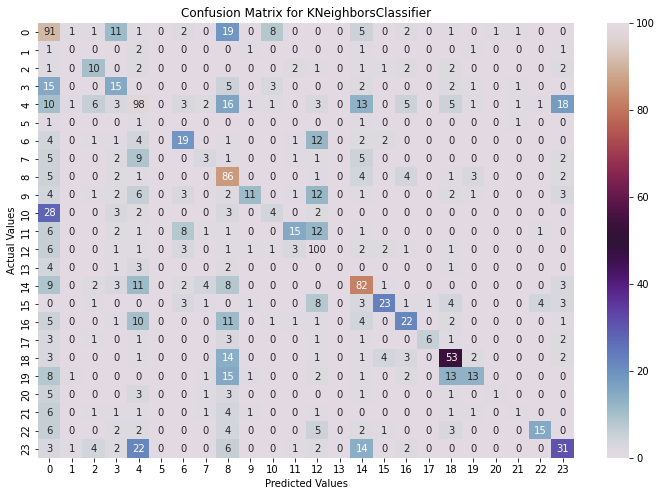

In [ ]:
# A better visualization for the confusion matrix of knn
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
predicted = knn.predict(X_test)
fig, ax=plt.subplots(figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test,predicted), annot=True, fmt=".5g",ax=ax, cmap='twilight')
ax.set(title="Confusion Matrix for KNeighborsClassifier")
ax.set(xlabel="Predicted Values", ylabel="Actual Values")




From the confusion matrix of KNN classifier, we can easily understand that some categories are confused with some others. Due to this fact, we can understand why the f1 score is too low. For instance, category 4 is confused the most with the categories  8, 14 and 23 and less with other categories. The more diagonal is the confusion matrix, the better results we expect from the classifier (higher f1 score). From the above confusion matrix, it follows that the classifier gets confused with other classes.

**Logistic Regression**

In [ ]:
# Logistic Regression
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/22
logistic = linear_model.LogisticRegression(multi_class="multinomial", random_state=39)
logistic = logistic.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We observe that logistic regression needs increased numbers of iterations to work correctly or to change the method used. Thus, we increase the number of iterations.

In [ ]:
# Logistic Regression with increased number of iterations
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/24

logistic = linear_model.LogisticRegression(max_iter=2000, multi_class="multinomial", random_state=39)
logistic = logistic.fit(X_train, y_train)

In [ ]:
# Accuracy and F1 score for logistic regression
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/97
predictions=logistic.predict(X_test)
print ("Accuracy score of Logistic Regression: {:.4f}".format(metrics.accuracy_score(y_test, predictions)))
print ("F1 score of Logistic Regression: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))


Accuracy score of Logistic Regression: 0.5154
F1 score of Logistic Regression: 0.4112


We observe that logistic regression F1 score is a slightly higher than the  F1 score of k-nn.

[Text(87.0, 0.5, 'Actual Values'), Text(0.5, 51.0, 'Predicted Values')]

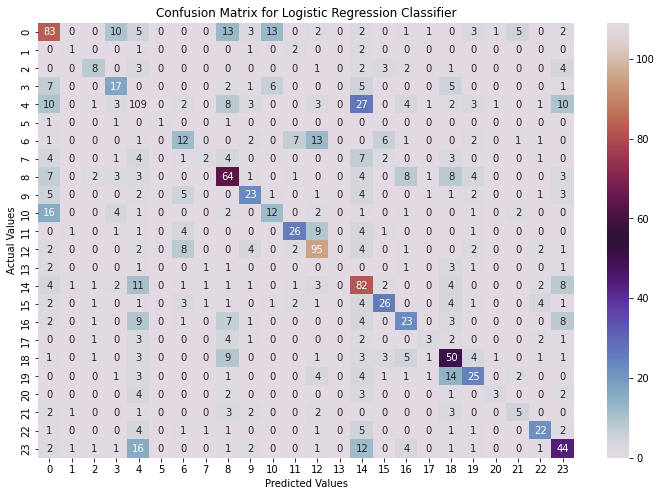

In [ ]:
# A better visualization for the confusion matrix of knn
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns
from sklearn import metrics
predicted = logistic.predict(X_test)
fig, ax=plt.subplots(figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test,predicted), annot=True, fmt=".5g",ax=ax, cmap='twilight')
ax.set(title="Confusion Matrix for Logistic Regression Classifier")
ax.set(xlabel="Predicted Values", ylabel="Actual Values")

From the above plot, we can undestand that given the fact that the logistic regression classifier classifies the most predicted values to the actual ones (the confusion matrix tends to be diagonial), gets confused with other categories such as KNN algorithm.

**SVM algorithm**

In [ ]:
# SVM algorithm with different methods & comparisson with the other algorithms
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/39
from sklearn import svm

svm_lin = svm.SVC(kernel="linear", random_state=39)
svm_poly = svm.SVC(kernel="poly", random_state=39)
svm_radial = svm.SVC(kernel="rbf", random_state=39)

svm_lin_m=svm_lin.fit(X_train, y_train)
svm_poly_m=svm_poly.fit(X_train, y_train)
svm_radial_m=svm_radial.fit(X_train, y_train)

print("SVM@Linear Accuracy score {:.4f}".format(svm_lin.score(X_test,y_test)))
print("SVM@poly Accuracy score {:.4f}".format(svm_poly.score(X_test,y_test)))
print("SVM@radial Accuracy score {:.4f}".format(svm_radial.score(X_test,y_test)))
# Although, we do not check the accuracy score because we have unbalanced data
# Below, is represented th F1 score for each method

SVM@Linear Accuracy score 0.5490
SVM@poly Accuracy score 0.5518
SVM@radial Accuracy score 0.6331


In [ ]:
# F1 SCORE for the algorithms KNN, logistic regression and SVM
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
predictions=knn.predict(X_test)
print ("F1 score KNN: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=logistic.predict(X_test)
print ("F1 score Logistic Regression: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=svm_lin_m.predict(X_test)
print ("F1 score SVM@Linear: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=svm_poly_m.predict(X_test)
print ("F1 score SVM@poly: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=svm_radial_m.predict(X_test)
print ("F1 score SVM@radial: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))


F1 score KNN: 0.3511
F1 score Logistic Regression: 0.4112
F1 score SVM@Linear: 0.4570
F1 score SVM@poly: 0.4517
F1 score SVM@radial: 0.4624


From the above results, we conclude that the best F1 score is given by the SVM algorithm with radial kernel. In the next step, we are going to estimate some parameters with the Grid Search Method in order to see which are the best estimators which will bring us a higher F1 score.


**SVM Grid Search**

In [ ]:
# Grid Search
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/43
# We are going to estimate the parameters C and gamma for polynomial kernel and then we will see the F1 score with these parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1e3, 5e3, 1e4],
              'gamma': [0.0001, 0.01, 0.1], }
clf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
clf = clf.fit(X_train, y_train)
clf.best_estimator_

SVC(C=1000.0, gamma=0.01)

In [ ]:
# Accuracy score computed with the best estimators of the specific parameterization and dataset
# F1 score and accuracy
from sklearn import svm
svm_radial = svm.SVC(kernel="rbf",C=1000.0,gamma=0.01)
svm_radial_m=svm_radial.fit(X_train, y_train)

In [ ]:
# Accuracy and F1 score for SVM method kernel=radial (Grid Search)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
predictions=svm_radial_m.predict(X_test)
print ("Accuracy SVM@radial Grid Search: {:.4f}".format(metrics.accuracy_score(y_test, predictions)))
print ("F1 SVM@radial Grid Search: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

Accuracy SVM@radial Grid Search: 0.6331
F1 SVM@radial Grid Search: 0.5326


**We observe that the higher F1 score is given by the Grid Search method with radial kernel**. Below, it is represented the confusion matrix of it.

[Text(87.0, 0.5, 'Actual Values'), Text(0.5, 51.0, 'Predicted Values')]

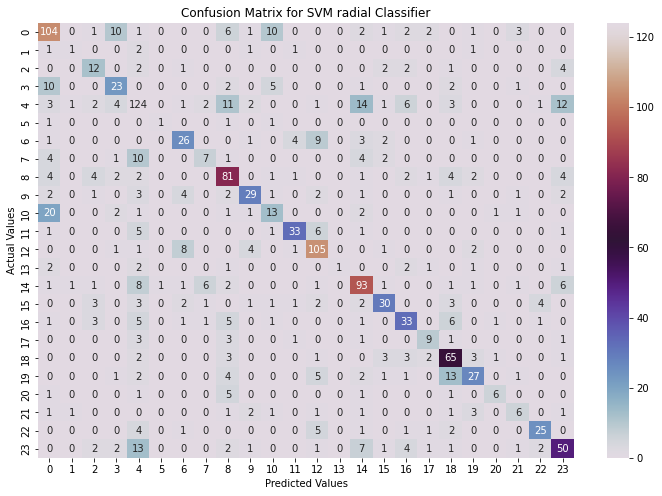

In [ ]:
# Confusion Matrix for SVM radial algorithm
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
predicted = svm_radial_m.predict(X_test)
fig, ax=plt.subplots(figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test,predicted), annot=True, fmt=".5g",ax=ax, cmap='twilight')
ax.set(title="Confusion Matrix for SVM radial Classifier")
ax.set(xlabel="Predicted Values", ylabel="Actual Values")

Actually, we observe that the confusion matrix in this case is more diagonial than the other algorithms. This classifier, seems to classify the categories better. This fact is verified both from the confusion matrix and the f1 score.

**Decision Trees**

In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from six import StringIO
from sklearn import tree
from IPython.display import Image
import pydotplus
# We convert our data to list because a series object has no attribute to algorithms
x=df_merged['normalized'].tolist()
y=df_merged['character']

In [ ]:
# Desicion Tree Classifier
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L6/Ensembling.slides.html#/35
from scipy.stats import sem
from sklearn.model_selection import cross_val_score
import numpy as np
# a simple tree with IG
d_tree = DecisionTreeClassifier(random_state=39, criterion="entropy")
cv_score = cross_val_score(estimator=d_tree, X=x, y=y, cv=5)
f1_score = cross_val_score(estimator=d_tree, X=x, y=y, cv=5, scoring='f1_macro')
print(f"Decision Tree Accuracy: {np.mean(cv_score):.4f}")
print(f"Decision Tree F1 score: {np.mean(f1_score):.4f}")

Decision Tree Accuracy: 0.2566
Decision Tree F1 score: 0.1820


We observe that F1 score is too low in the desicion tree classifier. Due to the fact that we have a lot of classes, desicion trees seems to be less accurate classifier in this case. Although, we are going to represent the random forest classifier with 25 number of estimators which is better than a simple decision tree.

**Random Forest**

In [ ]:
# Random forest
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L6/Ensembling.slides.html#/62
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, max_depth=None, min_samples_split=2, random_state=39, oob_score=True)
cv_score = cross_val_score(estimator=forest, X=x, y=y, cv=5)
f1_score = cross_val_score(estimator=forest, X=x, y=y, cv=5, scoring='f1_macro')
print(f"Random forest Accuracy: {np.mean(cv_score):.4f}")
print(f"Random forest F1 score: {np.mean(f1_score):.4f}")

Random forest Accuracy: 0.4245
Random forest F1 score: 0.2583


We observe that random forest classifier brings us better F1 score than forest classifier. However, none of them is too accurate to make predictions.
We observe that the f1 score given by the random forest method is too low. However, we will try to use an extremely randomized tree in order to see if our algorithm is improved.

**Extremely Randomized Trees**

In [ ]:
# Extremely Randomized Trees
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L6/Ensembling.slides.html#/63
from sklearn.ensemble import ExtraTreesClassifier

extremely_rts = ExtraTreesClassifier(n_estimators=25,
                                     max_depth=None,
                                     min_samples_split=2,
                                     random_state=39)
cv_score = cross_val_score(estimator=extremely_rts, X=x, y=y, cv=5)
f1_score = cross_val_score(estimator=extremely_rts, X=x, y=y, cv=5, scoring='f1_macro')
print(f"Extremely Randomized Trees Accuracy: {np.mean(cv_score):.4f}")
print(f"Extremely Randomized Trees F1 score: {np.mean(f1_score):.4f}")


Extremely Randomized Trees Accuracy: 0.4364
Extremely Randomized Trees F1 score: 0.2737


We observe that extremely randomized trees give us better F1 score for the same slit of the data set. However, none of the last tree algorithms (decision trees, random forest, extremely randomized forest) is an accurate algorithm to classify the objects correctly.



In conclusion, it is observed that the highest F1 score for the specific split of the dataset, is given by the SVM radial algorithm (0.5326 **53.26%**) with tunning (Grid Search). **Thus, the most appropriate algorithm, of those which have been represented above, for the task of classifying the character depicted in the image is the SVM radial algorithm.**

# Part 3 - Question Β

#Dataframe ds1

In [ ]:
# Create a new dataframe ds1_n which consists only of the columns normalized and TM
ds1_n=ds1[['normalized','TM']]
ds1_n

,normalized,TM
0,"[0.9352941176470588, 0.9117647058823529, 0.870...",60306
1,"[0.7622377622377622, 0.6783216783216783, 0.699...",60471
2,"[0.6260869565217392, 0.5130434782608696, 0.417...",60891
3,"[0.8448275862068966, 0.8563218390804598, 0.856...",60306
4,"[0.773109243697479, 0.7058823529411765, 0.6302...",60633
...,...,...
6091,"[0.4763779527559055, 0.3188976377952756, 0.338...",60306
6092,"[0.9416666666666667, 0.9166666666666666, 0.933...",60343
6093,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6166007905138...",60221
6094,"[0.46938775510204084, 0.45714285714285713, 0.4...",65858


In [ ]:
# Create a frequency table of TM
table_freq_TM=ds1_n['TM'].value_counts()
# table_freq_TM

In [ ]:
# https://stackoverflow.com/questions/66424216/drop-infrequent-values-in-column
# drop the TM whose sum is lower than 50 because they will not help the algorithm to train the model correctly due to the fact that they constitute a low percentage in the whole dataset.
to_drop = table_freq_TM[table_freq_TM <= 50].index
ds1_n = ds1_n[~ds1_n['TM'].isin(to_drop)]
# Reset the index after the dropped rows
ds1_n=ds1_n.reset_index()
ds1_n=ds1_n[['normalized','TM']]
ds1_n

,normalized,TM
0,"[0.9352941176470588, 0.9117647058823529, 0.870...",60306
1,"[0.7622377622377622, 0.6783216783216783, 0.699...",60471
2,"[0.6260869565217392, 0.5130434782608696, 0.417...",60891
3,"[0.8448275862068966, 0.8563218390804598, 0.856...",60306
4,"[0.773109243697479, 0.7058823529411765, 0.6302...",60633
...,...,...
5302,"[0.8089887640449438, 0.7921348314606742, 0.859...",60306
5303,"[0.4763779527559055, 0.3188976377952756, 0.338...",60306
5304,"[0.9416666666666667, 0.9166666666666666, 0.933...",60343
5305,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6166007905138...",60221


**Slit the dataset into train and test sets**

In [ ]:
# Create a train dataset and a test dataset keeping the 80% of the data we have at our disposal for training and the remaining ones for test
# We use the 80% of the data to train the model and 20% of them to test our model (if it brings us accurate results)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
train, test = train_test_split(ds1_n,test_size=0.20, random_state=39)

# from the train data set, keep the normalized column as X_train (80% of our data)
X_train=train.iloc[:,0]
# from the train data set, keep the TM column (target) as y_train
y_train=train.iloc[:,1]
# from the test data set, keep the normalized column as X_test (20% of our data)
X_test=test.iloc[:,0]
# from the test data set, keep the TM column (target) as X_test (20% of our data)
y_test=test.iloc[:,1]

In [ ]:
# The algorithms do not run for series objects. Thus, we convert the series object to list object
# https://www.geeksforgeeks.org/python-pandas-series-tolist/
X_train=X_train.tolist()
X_test=X_test.tolist()
y_train=y_train.tolist()
y_test=y_test.tolist()

**For each algorithm are represented the accuracy and the f1 scores. Due to the fact that our dataset is unbalanced we only check the f1 score.**

**KNN algorithm**

In [ ]:
# KNN algorithm
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/11
knn = neighbors.KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

Now, we are going to check the F1 score which is a metric used in datasets with unbalanced number of data such as this. The accuracy score is also represented but we are not going to check this score due to the fact that we have unbalanced data.

In [ ]:
# Accuracy and F1 score for KNN
predictions=knn.predict(X_test)
print ("KNN Accuracy score: {:.4f}".format(metrics.accuracy_score(y_test, predictions)))
print ("KNN F1 score: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

KNN Accuracy score: 0.2853
KNN F1 score: 0.1567


The F1 score of the KNN algorithm is extemely low (**15.67%**). This means that the specific classifier doesn't classify the instances to the actual instances. Below, is represented the metrics classification report of it.

In [ ]:
# Computation of more metrics in order to check the accuracy of knn
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/58
from sklearn import metrics
predicted = knn.predict(X_test)
print("Classification report for K-NN: \n",metrics.classification_report(y_test, predicted))

Classification report for K-NN: 
               precision    recall  f1-score   support

       59170       0.20      0.45      0.28        20
       60220       0.18      0.20      0.19        30
       60221       0.11      0.26      0.16        23
       60242       0.36      0.50      0.42        10
       60258       0.00      0.00      0.00        10
       60267       0.00      0.00      0.00        24
       60306       0.41      0.44      0.42       170
       60324       0.43      0.36      0.39        28
       60343       0.10      0.45      0.16        20
       60398       0.24      0.94      0.38        50
       60402       0.28      0.19      0.23        26
       60471       0.00      0.00      0.00        29
       60476       0.60      0.07      0.13        40
       60479       0.00      0.00      0.00        14
       60583       0.35      0.74      0.48       119
       60633       1.00      0.04      0.08        47
       60659       0.00      0.00      0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above report we can easily understand that the classifier confusies the majority of the classes since the f1 score for each class separetely is extremely low. Although, for some classes of  TM the classifier seems to be give more accurate results. That is, because these classes consists of more y_test and the classifier give us more accurate results. (ex. 60306 f1score=0.46, support=170).

**Logistic Regression**

In [ ]:
# Logistic Regression
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/22
logistic = linear_model.LogisticRegression(multi_class="multinomial", random_state=39)
logistic = logistic.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We observe that we have a warning message of logistic regression. So, we will increase the number of iterations.

In [ ]:
# Logistic Regression with increased number of iterations
# # https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/24
logistic = linear_model.LogisticRegression(max_iter=3000, multi_class="multinomial", random_state=39)
logistic = logistic.fit(X_train, y_train)

In [ ]:
# Accuracy and F1 score for logistic regression
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/97
predictions=logistic.predict(X_test)
print ("Accuracy score of Logistic Regression: {:.4f}".format(metrics.accuracy_score(y_test, predictions)))
print ("F1 score of Logistic Regression: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))


Accuracy score of Logistic Regression: 0.3616
F1 score of Logistic Regression: 0.2304


In [ ]:
# Computation of more metrics in order to check the accuracy of logistic regression
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/58
from sklearn import metrics
predicted = logistic.predict(X_test)
print("Classification report for Logistic Regression: \n",metrics.classification_report(y_test, predicted))

Classification report for Logistic Regression: 
               precision    recall  f1-score   support

       59170       0.08      0.05      0.06        20
       60220       0.23      0.30      0.26        30
       60221       0.12      0.09      0.10        23
       60242       0.00      0.00      0.00        10
       60258       0.00      0.00      0.00        10
       60267       0.43      0.12      0.19        24
       60306       0.50      0.69      0.58       170
       60324       0.26      0.18      0.21        28
       60343       0.17      0.20      0.19        20
       60398       0.36      0.30      0.33        50
       60402       0.47      0.35      0.40        26
       60471       0.14      0.07      0.09        29
       60476       0.10      0.12      0.11        40
       60479       0.25      0.14      0.18        14
       60583       0.47      0.72      0.57       119
       60633       0.52      0.47      0.49        47
       60659       0.40      0.1

We observe that F1 score for logistic regression is sligthly higher than those of K-NN algorithm. From the above report we can easily understand that the classifier confusies the majority of the classes since the f1 score for each class separetely is extremely low. Although, for some classes of  TM the classifier seems to be give more accurate results (ex.  60306 with f1_score=0.58 and support=170,   60583  with f1_score=0.57 and support=119 ) . That is, because these classes consists of more y_test and the classifier give us more accurate results.

**SMV algorithm**

In [ ]:
# SVM algorithm with different methods & comparisson with the other algorithms
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/39
from sklearn import svm

svm_lin = svm.SVC(kernel="linear", random_state=39)
svm_poly = svm.SVC(kernel="poly", random_state=39)
svm_radial = svm.SVC(kernel="rbf", random_state=39)

svm_lin_m=svm_lin.fit(X_train, y_train)
svm_poly_m=svm_poly.fit(X_train, y_train)
svm_radial_m=svm_radial.fit(X_train, y_train)

print("SVM@Linear Accuracy score {:.4f}".format(svm_lin.score(X_test,y_test)))
print("SVM@poly Accuracy score {:.4f}".format(svm_poly.score(X_test,y_test)))
print("SVM@radial Accuracy score {:.4f}".format(svm_radial.score(X_test,y_test)))
# Although we do not check the accuracy score because we have unbalanced data
# Below, is represented th F1 score for each method

SVM@Linear Accuracy score 0.3757
SVM@poly Accuracy score 0.3738
SVM@radial Accuracy score 0.5301


In [ ]:
# F1 SCORE for the algorithms KNN, logistic regression and SVM
predictions=knn.predict(X_test)
print ("F1 score KNN: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=logistic.predict(X_test)
print ("F1 score Logistic Regression: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=svm_lin_m.predict(X_test)
print ("F1 score SVM@Linear: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=svm_poly_m.predict(X_test)
print ("F1 score SVM@poly: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=svm_radial_m.predict(X_test)
print ("F1 score SVM@radial: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))


F1 score KNN: 0.1567
F1 score Logistic Regression: 0.2304
F1 score SVM@Linear: 0.2716
F1 score SVM@poly: 0.2664
F1 score SVM@radial: 0.3565


From the above results, we conclude that the higher F1 score is given by the SVM algorithm with radial kernel. In the next step, we are going to estimate some parameters with the Grid Search Method in order to see which are the best estimators which will bring us the higher F1 score.

**SVM Grid Search for radial**

In [ ]:
# Grid Search
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/43
# It has been observed that SVM rbf brings the most accurate results in the most classification problems. We are going to see what happens in this case
# We are going to estimate the parameters C and gamma and then we will see the accuracy score with these parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1e3, 5e3, 1e4],
              'gamma': [0.0001, 0.01, 0.1], }
clf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
clf = clf.fit(X_train, y_train)
clf.best_estimator_

SVC(C=1000.0, gamma=0.01)

In [ ]:
# Accuracy score computed with the best estimators of the specific parametrisation and dataset
# F1 score and accuracy
from sklearn import svm
svm_radial = svm.SVC(kernel="rbf",C=1000.0,gamma=0.01)
svm_radial_m=svm_radial.fit(X_train, y_train)


In [ ]:
# Accuracy and F1 score for SVM method kernel=radial (Grid Search)
# # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
predictions=svm_radial_m.predict(X_test)
print ("Accuracy SVM@radial Grid Search: {:.4f}".format(metrics.accuracy_score(y_test, predictions)))
print ("F1 SVM@radial Grid Search: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

Accuracy SVM@radial Grid Search: 0.5471
F1 SVM@radial Grid Search: 0.4389


In [ ]:
# Classification report for SVM method (kernel=radial) grid search
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/58
predicted = clf.best_estimator_.predict(X_test)
print("Classification report for SVM radial (Grid Search): \n",metrics.classification_report(y_test, predicted))

Classification report for SVM radial (Grid Search): 
               precision    recall  f1-score   support

       59170       0.27      0.20      0.23        20
       60220       0.38      0.37      0.37        30
       60221       0.58      0.48      0.52        23
       60242       0.36      0.50      0.42        10
       60258       0.09      0.10      0.10        10
       60267       0.44      0.29      0.35        24
       60306       0.54      0.73      0.62       170
       60324       0.53      0.32      0.40        28
       60343       0.31      0.40      0.35        20
       60398       0.55      0.56      0.55        50
       60402       0.44      0.31      0.36        26
       60471       0.50      0.34      0.41        29
       60476       0.46      0.42      0.44        40
       60479       0.54      0.50      0.52        14
       60583       0.60      0.76      0.67       119
       60633       0.70      0.81      0.75        47
       60659       0.60    

From the above report we can easily understand that the classifier classifies better the instances to the classes than the K-NN and logistic regression algorithm. The macro F1 score is higher from K-NN and logistic regression algorithm, since the f1 score of each class seems to be higher than the previous methods. Although, nobody can dispute the fact that the classifier is better than the previous cases but it also confuses the classes.

**Decision Trees**

In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from six import StringIO
from sklearn import tree
from IPython.display import Image
import pydotplus
# We convert our data to list because a series object has no attribute to DecisionTreeClassifier
x=ds1_n['normalized'].tolist()
y=ds1_n['TM']

In [ ]:
# Desicion Tree Classifier
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L6/Ensembling.slides.html#/35
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

clf = DecisionTreeClassifier(random_state=39)
clf = clf.fit(x, y)
d_tree = DecisionTreeClassifier(random_state=39)
cv_score = cross_val_score(estimator=d_tree, X=x, y=y, cv=5)
f1_score = cross_val_score(estimator=d_tree, X=x, y=y, cv=5, scoring='f1_macro')
print(f"Decision Tree Accuracy: {np.mean(cv_score):.4f}")
print(f"Decision Tree F1 score: {np.mean(f1_score):.4f}")

Decision Tree Accuracy: 0.2208
Decision Tree F1 score: 0.1468


We observe that F1 score is too low in the desicion tree classifier. Due to the fact that we have a lot of classes, desicion trees seems to be less accurate classifier in this case. Although, we are going to represent the random forest classifier with 25 number of estimators which is better than a simple decision tree.

Decision trees seems logical to not give us accurate results, since in the specific case we have many of classes.

**Random Forest**

In [ ]:
# Random forest
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L6/Ensembling.slides.html#/62
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, max_depth=None, min_samples_split=2, random_state=39, oob_score=True)
cv_score = cross_val_score(estimator=forest, X=x, y=y, cv=5)
f1_score = cross_val_score(estimator=forest, X=x, y=y, cv=5, scoring='f1_macro')
print(f"Random forest Accuracy: {np.mean(cv_score):.4f}")
print(f"Random forest F1 score: {np.mean(f1_score):.4f}")

Random forest Accuracy: 0.4014
Random forest F1 score: 0.2085


We observe that random forest classifier brings us better F1 score than forest classifier. However, none of them is too accurate to make predictions.
We observe that the accuracy score given by the decision tree method is too low. However, we will try to use an extremely randomized tree in order to see if our algorithm is improved.

**Extremely Randomized Trees**

In [ ]:
# Extremely Randomized Trees
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L6/Ensembling.slides.html#/63
from sklearn.ensemble import ExtraTreesClassifier

extremely_rts = ExtraTreesClassifier(n_estimators=25,
                                     max_depth=None,
                                     min_samples_split=2,
                                     random_state=39)
cv_score = cross_val_score(estimator=extremely_rts, X=x, y=y, cv=5)
f1_score = cross_val_score(estimator=extremely_rts, X=x, y=y, cv=5, scoring='f1_macro')
print(f"Extremely Randomized trees Accuracy: {np.mean(cv_score):.4f}")
print(f"Extremely Randomized trees F1 score: {np.mean(f1_score):.4f}")


Extremely Randomized trees Accuracy: 0.4091
Extremely Randomized trees F1 score: 0.2229


We observe that extremely randomized trees give us better F1 score for the same slit of the data set. However, none of the last tree algorithms (decision trees, random forest, extremely randomized forest) is an accurate algorithm to classify the objects correctly. These results, seems to be logical due to the fact that in the specific problem we have a lot of classes and these algorithms do not work well under these circumstances.

In conclusion, it is observed that the higher F1 score for the specific split of the dataset, is given by the SVM radial algorithm (0.4389) with tunning (Grid Search). **Thus, the most appropriate algorithm, of those which have been represented above, for the task of classifying the TM is the SVM radial algorithm.** Although, it is not recommended to be used for the specific classification problem since its f1 score remains low.

# Dataset ds2_new

In [ ]:
# Create a new dataframe ds2_n which consists only the columns normalized and century
ds2_n=ds2_new[['normalized','century']]
ds2_n

,normalized,century
0,"[0.9778761061946902, 0.9778761061946902, 0.982...",11
1,"[0.9316239316239316, 0.9401709401709402, 0.948...",10
2,"[0.9227053140096618, 0.9178743961352657, 0.913...",12
3,"[0.9863636363636363, 0.990909090909091, 0.9727...",11
4,"[0.9661016949152542, 0.9661016949152542, 0.966...",10
...,...,...
1077,"[0.9484978540772532, 0.9356223175965666, 0.944...",10
1078,"[0.8922413793103449, 0.9525862068965517, 0.965...",10
1079,"[0.9504950495049505, 0.9405940594059405, 0.930...",12
1080,"[0.8810810810810811, 0.8810810810810811, 0.881...",12


**Import libraries**

In [ ]:
# import the appropriate libraries
from sklearn import datasets, neighbors, linear_model
from sklearn.model_selection import train_test_split

**Split the dataset into train set and test set.**

In [ ]:
# split the data
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Create a train dataset and a test dataset keeping the 80% of the data we have at our disposal for training and the remaining ones for test
# We use the 80% of the data to train the model and 20% of them to test our model (if it brings us accurate results)
train, test = train_test_split(ds2_n,test_size=0.20, random_state=39)

# from the train data set, keep the normalized column as X_train (80% of our data)
X_train=train.iloc[:,0]
# from the train data set, keep the century column (target) as y_train (80% of our data)
y_train=train.iloc[:,1]
# from the test data set, keep the normalized column as X_test (20% of our data)
X_test=test.iloc[:,0]
# from the test data set, keep the century column (target) as X_test (20% of our data)
y_test=test.iloc[:,1]


In [ ]:
# The algorithms do not run for series objects. Thus, we convert the series object to list object
# https://www.geeksforgeeks.org/python-pandas-series-tolist/
X_train=X_train.tolist()
X_test=X_test.tolist()
y_train=y_train.tolist()
y_test=y_test.tolist()

**For each algorithm are represented the accuracy and the f1 scores. Due to the fact that our dataset is unbalanced we only check the f1 score.**

**K-NN algorithm**

In [ ]:
# KNN algorithm
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/11
knn = neighbors.KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

Now, we are going to check the F1 score which is a metric used in datasets with unbalanced number of data such as this. The accuracy score is also represented but we are not going to check this score due to the fact that we have unbalanced data.

In [ ]:
# Accuracy and F1 score for KNN
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
predictions=knn.predict(X_test)
print ("KNN Accuracy score: {:.4f}".format(metrics.accuracy_score(y_test, predictions)))
print ("KNN F1 Accuracy score: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

KNN Accuracy score: 0.5806
KNN F1 Accuracy score: 0.5690


In [ ]:
# Computation of more metrics in order to check the accuracy of knn
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/58
from sklearn import metrics
predicted = knn.predict(X_test)
print("Classification report for K-NN: \n",metrics.classification_report(y_test, predicted))

Classification report for K-NN: 
               precision    recall  f1-score   support

          10       0.44      0.98      0.61        65
          11       0.70      0.30      0.42        76
          12       0.97      0.51      0.67        76

    accuracy                           0.58       217
   macro avg       0.71      0.60      0.57       217
weighted avg       0.72      0.58      0.57       217



From the above classification report we observe that the f1 scores of the classes 10th and 12th is higher than the 11th and as a result the average f1 score (macro) is getting lower. However, the macro f1 score is 0.57 **(57%)**.

**Logistic Regression**

In [ ]:
# Logistic Regression
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/22
logistic = linear_model.LogisticRegression(multi_class="multinomial", random_state=39)
logistic = logistic.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We observe that we have a warning message for logistic regression. So, we will increase the number of iterations.

In [ ]:
# Logistic Regression with increased number of iterations
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/24
logistic = linear_model.LogisticRegression(max_iter=2000, multi_class="multinomial", random_state=39)
logistic = logistic.fit(X_train, y_train)

In [ ]:
# Accuracy and F1 score for logistic regression
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/97
predictions=logistic.predict(X_test)
print ("Accuracy score for Logistic Regression: {:.4f}".format(metrics.accuracy_score(y_test, predictions)))
print ("F1 score for Logistic Regression: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

Accuracy score for Logistic Regression: 0.7189
F1 score for Logistic Regression: 0.7148


We observe that with increased number of iterations, logistic regression gives as the better F1 score from k-nn algorithm.

In [ ]:
# classification report logistic
predicted = logistic.predict(X_test)
print("Classification report for logistic regression: \n",metrics.classification_report(y_test, predicted))

Classification report for logistic regression: 
               precision    recall  f1-score   support

          10       0.59      0.72      0.65        65
          11       0.61      0.53      0.56        76
          12       0.79      0.74      0.76        76

    accuracy                           0.66       217
   macro avg       0.66      0.66      0.66       217
weighted avg       0.66      0.66      0.66       217



From the above classification report, we can easily understand that the logistic regression classifier brings us better results from K-NN algorithm. This classifier, has higher probability to classify each test instance to the correct class. That is, due to the fact that the number of classes is only 3. Thus, by having smaller number of classes, the classifier has higher probability to caregorize them to the correct class. Also, we observe that the f1 score for the 12th century is higher than the other two. This means, that the algorithm is more possible to classify correct an image which actually belongs to 12th century, to the 12th century class.

In [ ]:
# SVM algorithm with different methods & comparisson with the other algorithms
# # https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/39
from sklearn import svm

svm_lin = svm.SVC(kernel="linear", random_state=39)
svm_poly = svm.SVC(kernel="poly", random_state=39)
svm_radial = svm.SVC(kernel="rbf", random_state=39)

svm_lin_m=svm_lin.fit(X_train, y_train)
svm_poly_m=svm_poly.fit(X_train, y_train)
svm_radial_m=svm_radial.fit(X_train, y_train)

print("SVM@Linear Accuracy score {:.4f}".format(svm_lin.score(X_test,y_test)))
print("SVM@poly Accuracy score {:.4f}".format(svm_poly.score(X_test,y_test)))
print("SVM@radial Accuracy score {:.4f}".format(svm_radial.score(X_test,y_test)))
# Although we do not check the accuracy score because we have unbalanced data
# Below, is represented th F1 score for each method

SVM@Linear Accuracy score 0.6406
SVM@poly Accuracy score 0.6498
SVM@radial Accuracy score 0.7558


In [ ]:
# F1 SCORE for the algorithms KNN, logistic regression and SVM
predictions=knn.predict(X_test)
print ("F1 score KNN: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=logistic.predict(X_test)
print ("F1 score Logistic Regression: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=svm_lin_m.predict(X_test)
print ("F1 score SVM@Linear: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=svm_poly_m.predict(X_test)
print ("F1 score SVM@poly: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

predictions=svm_radial_m.predict(X_test)
print ("F1 score SVM@radial: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))


F1 score KNN: 0.5690
F1 score Logistic Regression: 0.6579
F1 score SVM@Linear: 0.6418
F1 score SVM@poly: 0.6496
F1 score SVM@radial: 0.7556


From the above results, we conclude that the higher F1 score is given by the SVM algorithm with radial kernel. In the next step, we are going to estimate some parameters with the Grid Search Method in order to see which are the best estimators which will bring us the higher F1 score.

**SVM Grid Search radial**

In [ ]:
# Grid Search
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L5/classification.slides.html#/43
# It has been observed that SVM rbf brings the most accurate results in the most classification problems. We are going to see what happens in this case
# We are going to estimate the parameters C and gamma and then we will see the accuracy score with these parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1e3, 5e3, 1e4],
              'gamma': [0.0001, 0.01, 0.1], }
clf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
clf = clf.fit(X_train, y_train)
clf.best_estimator_

SVC(C=1000.0, gamma=0.1)

In [ ]:
# Accuracy score computed with the best estimators of the specific parametrisation and dataset
# F1 score and accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
from sklearn import svm

svm_radial = svm.SVC(kernel="rbf",C=1000.0,gamma=0.1)
svm_radial_m=svm_radial.fit(X_train, y_train)

In [ ]:
# Accuracy and F1 score for SVM method kernel=radial (Grid Search)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
predictions=svm_radial_m.predict(X_test)
print ("Accuracy SVM@radial Grid Search: {:.4f}".format(metrics.accuracy_score(y_test, predictions)))
print ("F1 SVM@radial Grid Search: {:.4f}".format(metrics.f1_score(y_test, predictions,average="macro")))

Accuracy SVM@radial Grid Search: 0.7880
F1 SVM@radial Grid Search: 0.7862


In [ ]:
# Classification report for SVM method (kernel=radial) without grid search
predicted = clf.best_estimator_.predict(X_test)
print("Classification report for Grid Search: \n",metrics.classification_report(y_test, predicted))

Classification report for Grid Search: 
               precision    recall  f1-score   support

          10       0.77      0.85      0.81        65
          11       0.81      0.66      0.72        76
          12       0.79      0.87      0.82        76

    accuracy                           0.79       217
   macro avg       0.79      0.79      0.79       217
weighted avg       0.79      0.79      0.79       217



From the above classification report, it is obvious that the SVM radial algorithm classifier, classifies the instances to their actual class with a high percentage. This fact occurs in every class. Especially, in the classes 10th century and 12th century the algorithm seems to bring more accurate results than the 10th century which also gives a satisfactory f1 score but lower than the other two f1 scores.
 Thus, the average F1 score is 0.79 (79%).

**Decision Trees**

In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from six import StringIO
from sklearn import tree
from IPython.display import Image
import pydotplus
# We convert our data to list because a series object has no attribute to the algorithms
x=ds2_n['normalized'].tolist()
y=ds2_n['century']

In [ ]:
# Desicion Tree Classifier
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L6/Ensembling.slides.html#/35
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

clf = DecisionTreeClassifier(random_state=39)
clf = clf.fit(x, y)
d_tree = DecisionTreeClassifier(random_state=39)
cv_score = cross_val_score(estimator=d_tree, X=x, y=y, cv=5)
f1_score = cross_val_score(estimator=d_tree, X=x, y=y, cv=5, scoring='f1_macro')
print(f"Decision Tree Accuracy: {np.mean(cv_score):.4f}")
print(f"Decision Tree F1 score: {np.mean(f1_score):.4f}")

Decision Tree Accuracy: 0.6580
Decision Tree F1 score: 0.6529


We observe that the decision tree classifier give better results in this case, due to the fact that we have only 3 classes of century. Below, is represented the random forest.

**Random Forest**

In [ ]:
# Random forest
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L6/Ensembling.slides.html#/62
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, max_depth=None, min_samples_split=2, random_state=39, oob_score=True)
cv_score = cross_val_score(estimator=forest, X=x, y=y, cv=5)
f1_score = cross_val_score(estimator=forest, X=x, y=y, cv=5, scoring='f1_macro')
print(f"Random forest Accuracy: {np.mean(cv_score):.4f}")
print(f"Random forest F1 score: {np.mean(f1_score):.4f}")

Random forest Accuracy: 0.7745
Random forest F1 score: 0.7677


We observe that random forest classifier brings us better F1 score than forest classifier. We will try to use an extremely randomized tree in order to see if our algorithm is improved much more.

**Extremely Randomized Trees**

In [ ]:
# Extremely Randomized Trees
# https://eclass.aueb.gr/modules/document/file.php/INF316/Lectures/L6/Ensembling.slides.html#/63
from sklearn.ensemble import ExtraTreesClassifier

extremely_rts = ExtraTreesClassifier(n_estimators=25,
                                     max_depth=None,
                                     min_samples_split=2,
                                     random_state=39)
cv_score = cross_val_score(estimator=extremely_rts, X=x, y=y, cv=5)
f1_score = cross_val_score(estimator=extremely_rts, X=x, y=y, cv=5, scoring='f1_macro')
print(f"Extremely Randomized trees Accuracy: {np.mean(cv_score):.4f}")
print(f"Extremely Randomized trees F1 score: {np.mean(f1_score):.4f}")

Extremely Randomized trees Accuracy: 0.8077
Extremely Randomized trees F1 score: 0.8027


We conclude, that the best f1 score for the specific split for the dataset, is given by the extremely randomized tree which slightly differs from the SVM radial algorithm. In this case, **for the task of classifying the century**, the extremely randomized tree give as better results because we have a small number of classes (only 3). Thus, both the SVM radial algorithm and the extremely randomized trees are recommended to be used for the classification problem in this case.

# Part 4
* Perform kmeans clustering on the images of the first dataset and select the optimum k using Normalised Mutual Information, where as ground truth is used (a) the character and (b) the century. Report the best k in each case.

# KMeans
**NMI, ground truth is used the character.**

The first dataset is the second in this assignment (and the second the first). Thus, we take the ds2_new data frame from Part 1 and we keep only the columns normalized, character and century.

In [ ]:
# Create a dataframe with the needed columns
ds2_n4=ds2_new[['normalized','character','century']]
ds2_n4

,normalized,character,century
0,"[0.9778761061946902, 0.9778761061946902, 0.982...",ν,11
1,"[0.9316239316239316, 0.9401709401709402, 0.948...",τ,10
2,"[0.9227053140096618, 0.9178743961352657, 0.913...",α,12
3,"[0.9863636363636363, 0.990909090909091, 0.9727...",τ,11
4,"[0.9661016949152542, 0.9661016949152542, 0.966...",σ,10
...,...,...,...
1077,"[0.9484978540772532, 0.9356223175965666, 0.944...",α,10
1078,"[0.8922413793103449, 0.9525862068965517, 0.965...",π,10
1079,"[0.9504950495049505, 0.9405940594059405, 0.930...",ι,12
1080,"[0.8810810810810811, 0.8810810810810811, 0.881...",ε,12


In [ ]:
# create a table frequency for the character
table4_char=ds2_n4['character'].value_counts()
# table4_char

In [ ]:
# https://stackoverflow.com/questions/66424216/drop-infrequent-values-in-column
# drop the characters whose sum is lower than 10 because they will not help the algorithm to train the model correctly due to the fact that they constitute a low percentage in the whole dataset/ lower than the 1% of the whole dataset
# we remove the characters whose sum in under 10 because when we split the dataset into train and test, the model we train would not have too many instances to train and maybe this would lead to misleading results.
to_drop = table4_char[table4_char <= 10].index
ds2_n4 = ds2_n4[~ds2_n4['character'].isin(to_drop)]

In [ ]:
# reset index of ds2_n4
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
ds2_n4=ds2_n4.reset_index()
ds2_n4=ds2_n4[['normalized','character','century']]
ds2_n4

,normalized,character,century
0,"[0.9778761061946902, 0.9778761061946902, 0.982...",ν,11
1,"[0.9316239316239316, 0.9401709401709402, 0.948...",τ,10
2,"[0.9227053140096618, 0.9178743961352657, 0.913...",α,12
3,"[0.9863636363636363, 0.990909090909091, 0.9727...",τ,11
4,"[0.9661016949152542, 0.9661016949152542, 0.966...",σ,10
...,...,...,...
1025,"[0.9484978540772532, 0.9356223175965666, 0.944...",α,10
1026,"[0.8922413793103449, 0.9525862068965517, 0.965...",π,10
1027,"[0.9504950495049505, 0.9405940594059405, 0.930...",ι,12
1028,"[0.8810810810810811, 0.8810810810810811, 0.881...",ε,12


We create 2 new columns, character category and century category, which contains the encoded category both for century and for character. We did that, because we want to make a prediction about the appropriate number of clusters we need to choose via kmeans algorithm. When the algorithm makes a prediction, it has to allign its results with the category. The result given by kmeans is numerical. Thus, if we had kept the column character with consists of str objects, an error would occur.

In [ ]:
# convert character and century columns to numeric
# https://www.statology.org/convert-categorical-variable-to-numeric-pandas/
ds2_n4['character category'] = pd.factorize(ds2_n4['character'])[0]
ds2_n4['century category'] = pd.factorize(ds2_n4['century'])[0]
ds2_n4


,normalized,character,century,character category,century category
0,"[0.9778761061946902, 0.9778761061946902, 0.982...",ν,11,0,0
1,"[0.9316239316239316, 0.9401709401709402, 0.948...",τ,10,1,1
2,"[0.9227053140096618, 0.9178743961352657, 0.913...",α,12,2,2
3,"[0.9863636363636363, 0.990909090909091, 0.9727...",τ,11,1,0
4,"[0.9661016949152542, 0.9661016949152542, 0.966...",σ,10,3,1
...,...,...,...,...,...
1025,"[0.9484978540772532, 0.9356223175965666, 0.944...",α,10,2,1
1026,"[0.8922413793103449, 0.9525862068965517, 0.965...",π,10,5,1
1027,"[0.9504950495049505, 0.9405940594059405, 0.930...",ι,12,8,2
1028,"[0.8810810810810811, 0.8810810810810811, 0.881...",ε,12,6,2


**Split the dataset into train and test**

In [ ]:
# Create a train dataset and a test dataset keeping the 80% of the data we have at our disposal for training and the remaining ones for test
# We use the 80% of the data to train the model and 20% of them to test our model (if it brings us accurate results)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
train, test = train_test_split(ds2_n4,test_size=0.20, random_state=39)

In [ ]:
# from the train data set, keep the normalized column as X_train (80% of our data)
X_train=train.iloc[:,0]
# from the train data set, keep the character category column (target) as y_train
y_train=train.iloc[:,3]
# from the test data set, keep the normalized column as X_test (20% of our data)
X_test=test.iloc[:,0]
# from the test data set, keep the character category column (target) as X_test (20% of our data)
y_test=test.iloc[:,3]

In [ ]:
# The algorithms do not run for series objects. Thus, we convert the series object to list object
# https://www.geeksforgeeks.org/python-pandas-series-tolist/
X_train=X_train.tolist()
X_test=X_test.tolist()
y_train=y_train.tolist()
y_test=y_test.tolist()

In [ ]:
# import libraries
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import MiniBatchKMeans
import numpy as np

In [ ]:
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
# The size of unique labels (clusters), in our case, 18.
n_char = len(np.unique(y_train))
print(n_char)

18


In [ ]:
# run the kmeans algorithm
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
# Since our data set is quite large we will use he mini-batch implementation of k-means clustering
# This will dramatically reduce the amount of time it takes to fit the algorithm to the data.
kmeans = MiniBatchKMeans(n_clusters=n_char, random_state=39)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=18, random_state=39)

The above are not the real labels of each image. We want to match this label with the real label. To match it with real label, we can tackle the following things.
*  Combine each images in the same group
*  Check Frequency distribution of actual labels (using np.bincount)
*  Find the Maximum frequent label (through np.argmax), and set the label.







To tackle with this problems we implement two functions.

In [ ]:
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """
    inferred_labels = {}
    # Loop through the clusters
    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels

In [ ]:
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

In [ ]:
# Change the type of y_train due to the fact that cluster_labels needs np.asarray type to run
# https://numpy.org/doc/stable/reference/generated/numpy.asarray.html
y_train = np.asarray(y_train)
y_test=np.asarray(y_test)

In [ ]:
# Make a comparison between the predicted labels and the y_train data
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y_train[:20])

[ 8  1 12  8  2  2  0  2  2 12  8  1  5  2  2 16  0 12  0  8]
[ 1  5  6  8  8 10  0 14 12  4  8 17  5  4  4  6  2  2 12 10]


From the above, we can easily undestand that the Kmeans algorithm does not cluster the data to the correct clusters. This seems to be logical, due to the fact that we have a lot of clusters and it is very difficult to cluster the data to the actual labels. For example, kmeans has wrongly classified an object which realy belongs to the 1st category to 8th category (the first line contains the predicted labels and the second line contains the ground truth).

In [ ]:
# Create a function which computes the nmi score
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
from sklearn.metrics import normalized_mutual_info_score

def calc_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))

    # Normalized Mutual Info score
    nmi = normalized_mutual_info_score(labels, estimator.labels_)
    print("nmi score: {:.4f}".format(nmi))
    return nmi

In [ ]:
# Computation of nmi and accuracy score for different number of clusters
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
from sklearn.metrics import accuracy_score
clusters = range(10,50,5)
nmi_list = []
acc_list = []

for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters=n_clusters)
    estimator.fit(X_train)

    nmi = calc_metrics(estimator, X_train, y_train)
    nmi_list.append(nmi)

    # Determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y_train)
    prediction = infer_data_labels(estimator.labels_, cluster_labels)

    acc = accuracy_score(y_train, prediction)
    acc_list.append(acc)
    print('Accuracy: {:.4f}\n'.format(acc))

Number of Clusters: 10
nmi score: 0.1364
Accuracy: 0.1990

Number of Clusters: 15
nmi score: 0.1732
Accuracy: 0.2512

Number of Clusters: 20
nmi score: 0.2075
Accuracy: 0.2718

Number of Clusters: 25
nmi score: 0.2349
Accuracy: 0.2937

Number of Clusters: 30
nmi score: 0.2301
Accuracy: 0.2900

Number of Clusters: 35
nmi score: 0.2498
Accuracy: 0.3240

Number of Clusters: 40
nmi score: 0.2640
Accuracy: 0.3240

Number of Clusters: 45
nmi score: 0.2923
Accuracy: 0.3495



As we already know, the NMI score fluctuates between [0,1]. Thus, the preferred number of clusters by using Kmeans algorithm and by checking the NMI score is this, whose value converges to 1. From the above results, we can understand that as the number of clusters increases, the NMI score icreaces too. This fact, seems to be logical due to the fact that as the number of clusters increases the clustering will be more 'accurate' due to the fact that each instance would have each cluster and thus no clustering would have been considered.
Here, we have unbalance data so the accuracy score is not considered. However, it is represented to the above results.
Furthermore, we choose a range between 10 and 45 due to the fact that we know that we have at out disposal 18 characters of the specific dataframe and we want to make our prediction more accurate either by using a smaller number of clusters or a bigger which make sense though.
Below is represented a plot of it.

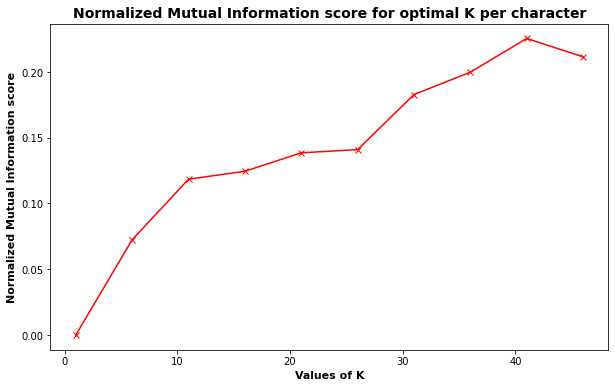

In [ ]:
# Plot the NMI score vs values of K
# https://ankitajhumu.medium.com/selecting-number-of-clusters-in-k-mean-clustering-d60a1f85d65b
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

nmi = []
K = range(1,50,5)
for num_clusters in K :
  kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=39)
  kmeans.fit(X_train)
  cluster_labels = infer_cluster_labels(kmeans, y_train)
  X_clusters = kmeans.predict(X_train)
  predicted_labels = infer_data_labels(X_clusters, cluster_labels)
  nmi.append(normalized_mutual_info_score(y_train, predicted_labels, average_method='arithmetic'))
figure(figsize=(10, 6))
plt.plot(K,nmi,"bx-", color='red')
plt.xlabel("Values of K", size=11, weight='bold')
plt.ylabel("Normalized Mutual Information score", size=11, weight='bold')
plt.title("Normalized Mutual Information score for optimal K per character", size=14, weight='bold')
plt.show()

Given the fact that the NMI score is too low  for the different number of clusters we can claim that we want a large number of clusters in order our clustering to be as accurate as desired. Although, we want a number of clusters which make sense. Thus, we will choose a number of clusters which make sence for the specific clustering given the fact that is extremely low, compared with the other k whose NMI scores are lower.
Both from the above results and the plot, we can undestand that there is a peak in NMI score for 27 clusters. However, the nmi score is extremely low as we mentioned before but the number of clusters seems logical to be 27 since we already know that the labels are 18.

# KMeans
**NMI, ground truth is used the century.**

In [ ]:
# create a table frequency for the century
table_century=ds2_new['century'].value_counts()
table_century

12    398
11    350
10    334
Name: century, dtype: int64

In [ ]:
ds2_n4.head()

,normalized,character,century,character category,century category
0,"[0.9778761061946902, 0.9778761061946902, 0.982...",ν,11,0,0
1,"[0.9316239316239316, 0.9401709401709402, 0.948...",τ,10,1,1
2,"[0.9227053140096618, 0.9178743961352657, 0.913...",α,12,2,2
3,"[0.9863636363636363, 0.990909090909091, 0.9727...",τ,11,1,0
4,"[0.9661016949152542, 0.9661016949152542, 0.966...",σ,10,3,1


**Split the dataset into train and test sets.**

In [ ]:
# Create a train dataset and a test dataset keeping the 80% of the data we have at our disposal for training and the remaining ones for test
# We use the 80% of the data to train the model and 20% of them to test our model (if it brings us accurate results)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
train, test = train_test_split(ds2_n4,test_size=0.20, random_state=39)

In [ ]:
# from the train data set, keep the normalized column as X_train (80% of our data)
X_train=train.iloc[:,0]
# from the train data set, keep the century category column (target) as y_train
y_train=train.iloc[:,4]
# from the test data set, keep the normalized column as X_test (20% of our data)
X_test=test.iloc[:,0]
# from the test data set, keep the century category column (target) as X_test (20% of our data)
y_test=test.iloc[:,4]

In [ ]:
# The algorithms do not run for series objects. Thus, we convert the series object to list object
# https://www.geeksforgeeks.org/python-pandas-series-tolist/
X_train=X_train.tolist()
X_test=X_test.tolist()
y_train=y_train.tolist()
y_test=y_test.tolist()

In [ ]:
# import libraries
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import MiniBatchKMeans
import numpy as np

In [ ]:
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c #########
# The size of unique labels (clusters), in our case, 3.
import numpy as np
n_char = len(np.unique(y_train))
print(n_char)

3


In [ ]:
# run the kmeans algorithm
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
# Since our data set is quite large we will use he mini-batch implementation of k-means clustering
# This will dramatically reduce the amount of time it takes to fit the algorithm to the data.
kmeans = MiniBatchKMeans(n_clusters=n_char, random_state=39)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=3, random_state=39)

The above are not the real labels of each image. We want to match this label with the real label. To match it with real label, we can tackle the following things.
*  Combine each images in the same group
*  Check Frequency distribution of actual labels (using np.bincount)
*  Find the Maximum frequent label (through np.argmax), and set the label.

In [ ]:
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c #####
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """
    inferred_labels = {}
    # Loop through the clusters
    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
    return inferred_labels

In [ ]:
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

In [ ]:
# Change the type of y_train due to the fact that cluster_labels needs np.asarray type to run
# https://numpy.org/doc/stable/reference/generated/numpy.asarray.html
y_train = np.asarray(y_train)
y_test=np.asarray(y_test)

In [ ]:
# Make a comparison between the predicted labels and the y_train data
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[20:40])
print(y_train[20:40])

[2 1 2 1 2 2 2 2 1 1 1 2 2 2 2 1 1 2 1 2]
[2 1 2 0 2 1 2 2 2 0 1 2 0 2 2 1 1 2 0 2]


From the above, we can easily undestand that the Kmeans algorithm does not usually cluster the data to the correct clusters.  For example, kmeans has wrongly clustered an object which realy belongs to the 1th category to 0th category. (the first line contains the predicted labels and the second line contains the ground truth. Although, from the above results it can be inferred that the algorithm seems to predict the 2nd category correctly and rarely confuses it with another category. This inference, was made in part 3. By looking the f1 scores of each class, we observed that the 12th century (2nd cluster here) rarely confused with the other two classes. (had higher f1 score than the other 2).

In [ ]:
# Create a function which computes the inertia and the nmi score
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
from sklearn.metrics import normalized_mutual_info_score

def calc_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))

    # Normalized Mutual Info score
    nmi = normalized_mutual_info_score(labels, estimator.labels_)
    print("nmi score: {:.4f}".format(nmi))
    return nmi

In [ ]:
# Computation of nmi and accuracy score for different number of clusters
# https://goodboychan.github.io/python/machine_learning/natural_language_processing/vision/2020/10/26/01-K-Means-Clustering-for-Imagery-Analysis.html?fbclid=IwAR0qJheovZdGABMbjxiCSAehvVojSB9aHcAPUygrTpMLoGJi_BITrGwTD-c
from sklearn.metrics import accuracy_score
clusters = range(2,50,5)
nmi_list = []
acc_list = []

for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters=n_clusters)
    estimator.fit(X_train)

    nmi = calc_metrics(estimator, X_train, y_train)
    nmi_list.append(nmi)

    # Determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y_train)
    prediction = infer_data_labels(estimator.labels_, cluster_labels)

    acc = accuracy_score(y_train, prediction)
    acc_list.append(acc)
    print('Accuracy: {:.4f}\n'.format(acc))

Number of Clusters: 2
nmi score: 0.1452
Accuracy: 0.5279

Number of Clusters: 7
nmi score: 0.1426
Accuracy: 0.6117

Number of Clusters: 12
nmi score: 0.1507
Accuracy: 0.6347

Number of Clusters: 17
nmi score: 0.1353
Accuracy: 0.5910

Number of Clusters: 22
nmi score: 0.1606
Accuracy: 0.6068

Number of Clusters: 27
nmi score: 0.1427
Accuracy: 0.6238

Number of Clusters: 32
nmi score: 0.1535
Accuracy: 0.6347

Number of Clusters: 37
nmi score: 0.1593
Accuracy: 0.6687

Number of Clusters: 42
nmi score: 0.1534
Accuracy: 0.6432

Number of Clusters: 47
nmi score: 0.1565
Accuracy: 0.6481



As we already know, the NMI score fluctuates between [0,1]. Thus, the prefered number of clusters by using Kmeans algorithm and by checking the NMI score is this, whose value converges to 1. From the above results, we can infer that as the number of clusters increases, the NMI score icreaces too. This fact, seems to be logical due to the fact that as the number of clusters increases the clustering will be more 'accurate' due to the fact that each instance would have each cluster and thus no clustering would have been considered.
Here, we have unbalance data so the accuracy score is not taken into account. However, it is represented to the above results.
Furthermore, we choose a range between 2 and 50 due to the fact that we already know that we have at our disposal 3 classes of centuries of the specific dataframe and we want to make our prediction more accurate either by using a smaller number of clusters or a bigger which make sense though.
Below is represented a plot of it.

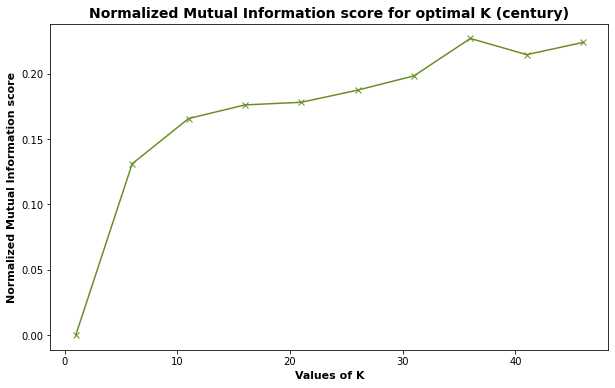

In [ ]:
# Plot the NMI score vs values of K
# https://ankitajhumu.medium.com/selecting-number-of-clusters-in-k-mean-clustering-d60a1f85d65b
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

nmi = []
K = range(1,50,5)
for num_clusters in K :
  kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=39)
  kmeans.fit(X_train)
  cluster_labels = infer_cluster_labels(kmeans, y_train)
  X_clusters = kmeans.predict(X_train)
  predicted_labels = infer_data_labels(X_clusters, cluster_labels)
  nmi.append(normalized_mutual_info_score(y_train, predicted_labels, average_method='arithmetic'))
figure(figsize=(10, 6))
plt.plot(K,nmi,"bx-", color='olivedrab')
plt.xlabel("Values of K", size=11, weight='bold')
plt.ylabel("Normalized Mutual Information score", size=11, weight='bold')
plt.title("Normalized Mutual Information score for optimal K (century)", size=14, weight='bold')
plt.show()

Given the fact that the NMI score is too low  for the different number of clusters we can claim that we want a large number of clusters in order our clustering to be as accurate as desired. Although, we want a number of clusters which make sense. Thus, we will choose a number of clusters which make sence for the specific clustering given the fact that is extremely low, compared with the other k whose NMI scores are lower.
Both from the above results and the plot, we can undestand that there is a peak in NMI score for 7 clusters. However, the nmi score is extremely low as we mentioned before but the number of clusters seems logical to be 7 since we already know that the actual labels are 3. Also, if we want to make our clustering more accurate we can choose 35 clusters. For k=35 nmi score seems also to have a peak. Although, as we already know the actual labels are 3, thus it doen't make sense to take 35 clusters.

# Part 5
* Cluster the images of the second dataset __per character__, selecting the optimum K per character by using the Davies Bouldin criterion (note: it does not require any ground truth). Show images per cluster per character. Qualitatively assess your clustering (per character) based on this visualisation.

Hint: You can ignore rare characters.

* The second dataset is the first in the specific assigment (and the first the second).

In [ ]:
# Create a new dataframe named ds1_n5
ds1_n5=ds1[['normalized','character']]
ds1_n5

,normalized,character
0,"[0.9352941176470588, 0.9117647058823529, 0.870...",ξ
1,"[0.7622377622377622, 0.6783216783216783, 0.699...",ξ
2,"[0.6260869565217392, 0.5130434782608696, 0.417...",ξ
3,"[0.8448275862068966, 0.8563218390804598, 0.856...",ξ
4,"[0.773109243697479, 0.7058823529411765, 0.6302...",ξ
...,...,...
6091,"[0.4763779527559055, 0.3188976377952756, 0.338...",ζ
6092,"[0.9416666666666667, 0.9166666666666666, 0.933...",ζ
6093,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6166007905138...",ζ
6094,"[0.46938775510204084, 0.45714285714285713, 0.4...",ζ


In [ ]:
# create a table frequency for the character
table_freq5=ds1_n5['character'].value_counts()
# table_freq5

In [ ]:
# https://stackoverflow.com/questions/66424216/drop-infrequent-values-in-column
# drop the characters whose sum is lower than 10 because they will not help me to train the model correctly due to the fact that they constitute a low percentage in the whole dataset/ lower than the 1% of the whole dataset
to_drop = table_freq5[table_freq5 <= 10].index
ds1_n5 = ds1_n5[~ds1_n5['character'].isin(to_drop)]

In [ ]:
# Reset index
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
ds1_n5=ds1_n5.reset_index()
ds1_n5=ds1_n5[['normalized','character']]
ds1_n5

,normalized,character
0,"[0.9352941176470588, 0.9117647058823529, 0.870...",ξ
1,"[0.7622377622377622, 0.6783216783216783, 0.699...",ξ
2,"[0.6260869565217392, 0.5130434782608696, 0.417...",ξ
3,"[0.8448275862068966, 0.8563218390804598, 0.856...",ξ
4,"[0.773109243697479, 0.7058823529411765, 0.6302...",ξ
...,...,...
6066,"[0.4763779527559055, 0.3188976377952756, 0.338...",ζ
6067,"[0.9416666666666667, 0.9166666666666666, 0.933...",ζ
6068,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6166007905138...",ζ
6069,"[0.46938775510204084, 0.45714285714285713, 0.4...",ζ


In [ ]:
# convert character column to numeric
# https://www.statology.org/convert-categorical-variable-to-numeric-pandas/
ds1_n5['character category'] = pd.factorize(ds1_n5['character'])[0]
ds1_n5

,normalized,character,character category
0,"[0.9352941176470588, 0.9117647058823529, 0.870...",ξ,0
1,"[0.7622377622377622, 0.6783216783216783, 0.699...",ξ,0
2,"[0.6260869565217392, 0.5130434782608696, 0.417...",ξ,0
3,"[0.8448275862068966, 0.8563218390804598, 0.856...",ξ,0
4,"[0.773109243697479, 0.7058823529411765, 0.6302...",ξ,0
...,...,...,...
6066,"[0.4763779527559055, 0.3188976377952756, 0.338...",ζ,22
6067,"[0.9416666666666667, 0.9166666666666666, 0.933...",ζ,22
6068,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6166007905138...",ζ,22
6069,"[0.46938775510204084, 0.45714285714285713, 0.4...",ζ,22


In [ ]:
# number of actual labels
len(ds1_n5['character'].value_counts())

23

In [ ]:
# all the followed code has taken from the source : https://towardsdatascience.com/a-step-by-step-guide-for-clustering-images-4b45f9906128
# install Clustimage
!pip install Clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 296 kB 17.7 MB/s 
     |████████████████████████████████| 88 kB 6.6 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=e76d94109478cba9c721a439822dc6c22379fbb2da93668a7ba384c5cc1b21ea
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=aab088edc7d28f1676bc64e55b626294b53f2094db560289c5e8feb0f033f7a9
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=3a31313ae56e2470cb30394091d34642fe74a65ee4a3721a9724e68abbca9eee
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
# Import libraries
from clustimage import Clustimage
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Change the type of the column 'normalized' in ds1_n5
# Keep the column normalized of ds1_n5 in a x
x=ds1_n5['normalized'].tolist()
x=np.stack(x)
x.shape

(6071, 784)

PCA method is used in order to achieve dimensionality reduction to the problem. Thus, the clustering  and the visualization of the images become less complex.

In [ ]:
# Cluster of images
# pca method is used in order to achieve dimensionality reduction to the problem. Thus, the clustering  and the visualization of the images become less complex.
cl = Clustimage(method='pca',
                embedding='tsne',
                grayscale=True,
                dim=(28,28),
                params_pca={'n_components':0.95})

In [ ]:
# results of the clustimage
# We mention that the actual number of clusters in the specific dataset is 23.
# Thus, it makes sense to take a range between 10 and 40 due to the fact that we are looking for a number of cluster which is not enough smaller or longer of the actual labels.
# Find the number of clusters by using Davies Bouldin criterion
results = cl.fit_transform(x,
                           cluster='agglomerative',
                           evaluate='dbindex',     # Davies Bouldin criterion
                           metric='euclidean',
                           linkage='ward',
                           min_clust=10,
                           max_clust=40,
                           cluster_space='low')

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 6071/6071 [00:01<00:00, 5019.05it/s]
[clustimage] >INFO> Extracting features using method: [pca]


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [784] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [387] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [784] columns of the input dataframe.
[pca] >Fit using PCA.


[clustimage] >INFO> Extracted features using [pca]: samples=6071, features=387
[clustimage] >INFO> Compute [tsne] embedding


[pca] >Compute loadings and PCs.


[clustimage] >INFO> Cluster evaluation using the [low] feature space of the [tsne] coordinates.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using dbindex.


100%|██████████| 30/30 [00:02<00:00, 13.31it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (6071, 2) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [39].
[clusteval] >Fin.


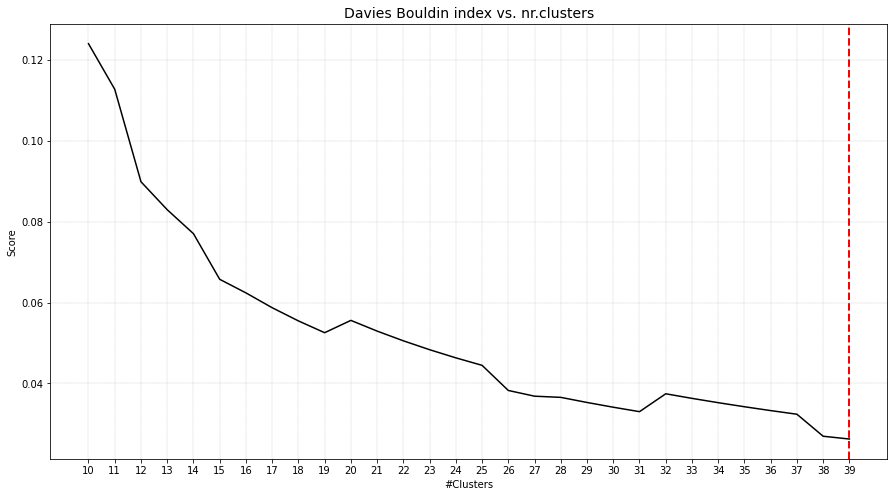

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f22d812aee0>)

In [ ]:
# Plot
results=cl.results
cl.clusteval.plot()

We are looking for the lower Davies Bouldin score as the lower the average similarity is, the better the clusters are separated and the better is the result of the clustering performed. Thus, from the above plot, it is obvious that for the specific range [10,40] the 'best' Davies Bouldin score is achieved for 39 number of clusters (db=0.03). By doing experiments, it is observed that as the range of numbers of cluster increases, the db score dicreases. This fact, seems logical since as the number of clusters converges to the number of the rows of the dataset the db score would be approximately zero. In this way, we have made a clustering which doesn't make sense. Our target is to find a number of clusters which make sense, since we already know that the actual labels are 23 in this case, and give us a low db score value.
From the above plot, we can easily undestand that the actual labels which are 23, is a good number of clusters which categorize the instances with a value of db score almost 0.05. Then, we observe that for the range [24, 30] the db score dicreases until it takes its minimum value for K=31 and then starts to increase again when for K=38 starts again to dicrease. We have to mention that the minimum db score (for the specific range) is observed for k=39 (almost 0.03). However, given the fact that the db score dicreases as the number of clusters increases, we would claim that the number of cluster k=31 is enough satisfying since the db score achieves a low score and also make sense to take 31 clusters, since we have already seen (from the part 3) that the classification of the images for 23 labels is not enough satisfying.   

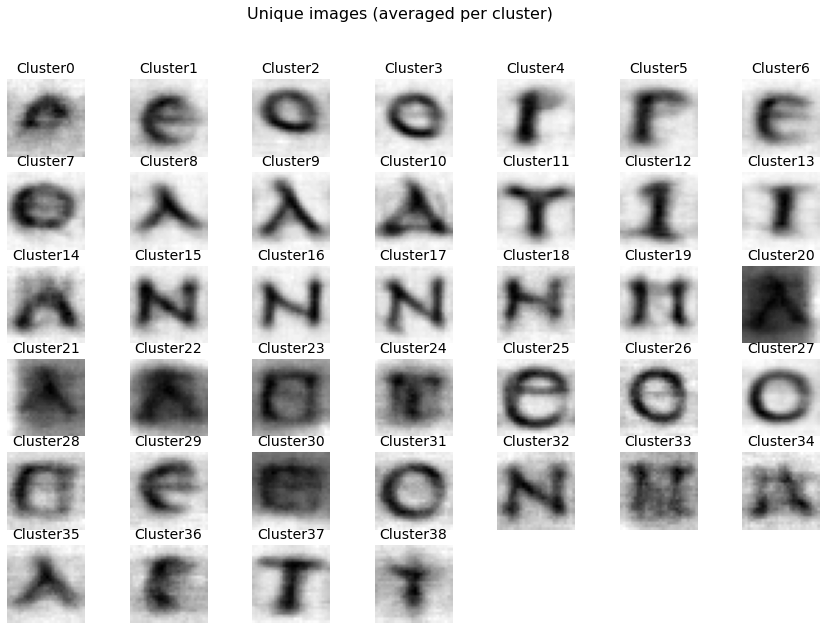

In [ ]:
# Show images per cluster per character.
cl.plot_unique()

From the above plot, for 38 clusters, we observe that the algorithm cannot easily discrete some images which depicts the same character. For example, it seems to confusies the character N since it has made 5 different clusters with the same character. These results seems logical since even a person confront difficulties to discrete some letters.